In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [57]:
from pathlib import Path
game_sales = Path("Video_Games.csv")
game_sales_df = pd.read_csv(game_sales)
game_sales_df = game_sales_df.loc[game_sales_df['Global_Sales'] >= 1,:]
game_sales_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
genre_counts = game_sales_df['Genre'].value_counts()
genre_counts

Action          421
Sports          305
Shooter         256
Role-Playing    203
Platform        194
Racing          182
Misc            169
Fighting        125
Simulation       93
Puzzle           55
Adventure        41
Strategy         31
Name: Genre, dtype: int64

Genre sales percentages for territories. Hoping to get a sense of each genres market share within the different territories. 

In [45]:
# NA
ttl_NA_sales = game_sales_df['NA_Sales'].sum()

NA_genre_ttl_sales = game_sales_df.groupby('Genre')['NA_Sales'].sum()

NA_Genre_pert = (NA_genre_ttl_sales/ttl_NA_sales)*100

NA_Genre_pert.sort_values(ascending = False)

NA_pert_sales_genre = NA_Genre_pert.sort_values(ascending = False)

# EU
ttl_EU_sales = game_sales_df['EU_Sales'].sum()

EU_genre_ttl_sales = game_sales_df.groupby('Genre')['EU_Sales'].sum()

EU_Genre_pert = (EU_genre_ttl_sales/ttl_EU_sales)*100

EU_Genre_pert.sort_values(ascending = False)

EU_pert_sales_genre = EU_Genre_pert.sort_values(ascending = False)

# JP
ttl_JP_sales = game_sales_df['JP_Sales'].sum()

JP_genre_ttl_sales = game_sales_df.groupby('Genre')['JP_Sales'].sum()

JP_Genre_pert = (JP_genre_ttl_sales/ttl_JP_sales)*100

JP_Genre_pert.sort_values(ascending = False)


JP_pert_sales_genre = JP_Genre_pert.sort_values(ascending = False)

# Other Sales 

ttl_Other_sales = game_sales_df['Other_Sales'].sum()

Other_genre_ttl_sales = game_sales_df.groupby('Genre')['Other_Sales'].sum()

Other_Genre_pert = (Other_genre_ttl_sales/ttl_Other_sales)*100

Other_Genre_pert.sort_values(ascending = False)


Other_pert_sales_genre = Other_Genre_pert.sort_values(ascending = False)

# Global Sales 

ttl_Global_sales = game_sales_df['Global_Sales'].sum()

Global_genre_ttl_sales = game_sales_df.groupby('Genre')['Global_Sales'].sum()

Global_Genre_pert = (Global_genre_ttl_sales/ttl_Global_sales)*100

Global_Genre_pert.sort_values(ascending = False)


Global_pert_sales_genre = Global_Genre_pert.sort_values(ascending = False)

# df Sale percentage for genre per territory
Genre_salespercentage_df= pd.DataFrame({'NA_Genre_%_sales': NA_Genre_pert,
              'EU_Genre_%_sales': EU_Genre_pert,
              'JP_Genre_%_sales':JP_Genre_pert,
              'Other_Genre_%_sales':Other_Genre_pert, 
              'Global_Genre_%_sales':Global_Genre_pert})

Genre_salespercentage_df


,NA_Genre_%_sales,EU_Genre_%_sales,JP_Genre_%_sales,Other_Genre_%_sales,Global_Genre_%_sales
Genre,,,,,
Action,18.689107,20.503116,10.642888,23.043960,18.596461
Adventure,1.604613,1.815267,1.310782,1.300581,1.599244
Fighting,5.153517,4.019262,5.406631,4.461819,4.791955
Misc,8.387441,8.371804,7.442877,8.491364,8.272096
Platform,12.359064,9.480732,15.362526,7.187024,11.423670
Puzzle,2.836260,1.969553,5.096110,1.398312,2.739510
Racing,8.103958,9.639839,6.170566,10.122728,8.492132
Role-Playing,8.391378,8.561648,30.767645,7.861748,11.240569
Shooter,16.077986,14.164748,3.065360,14.885259,13.753217


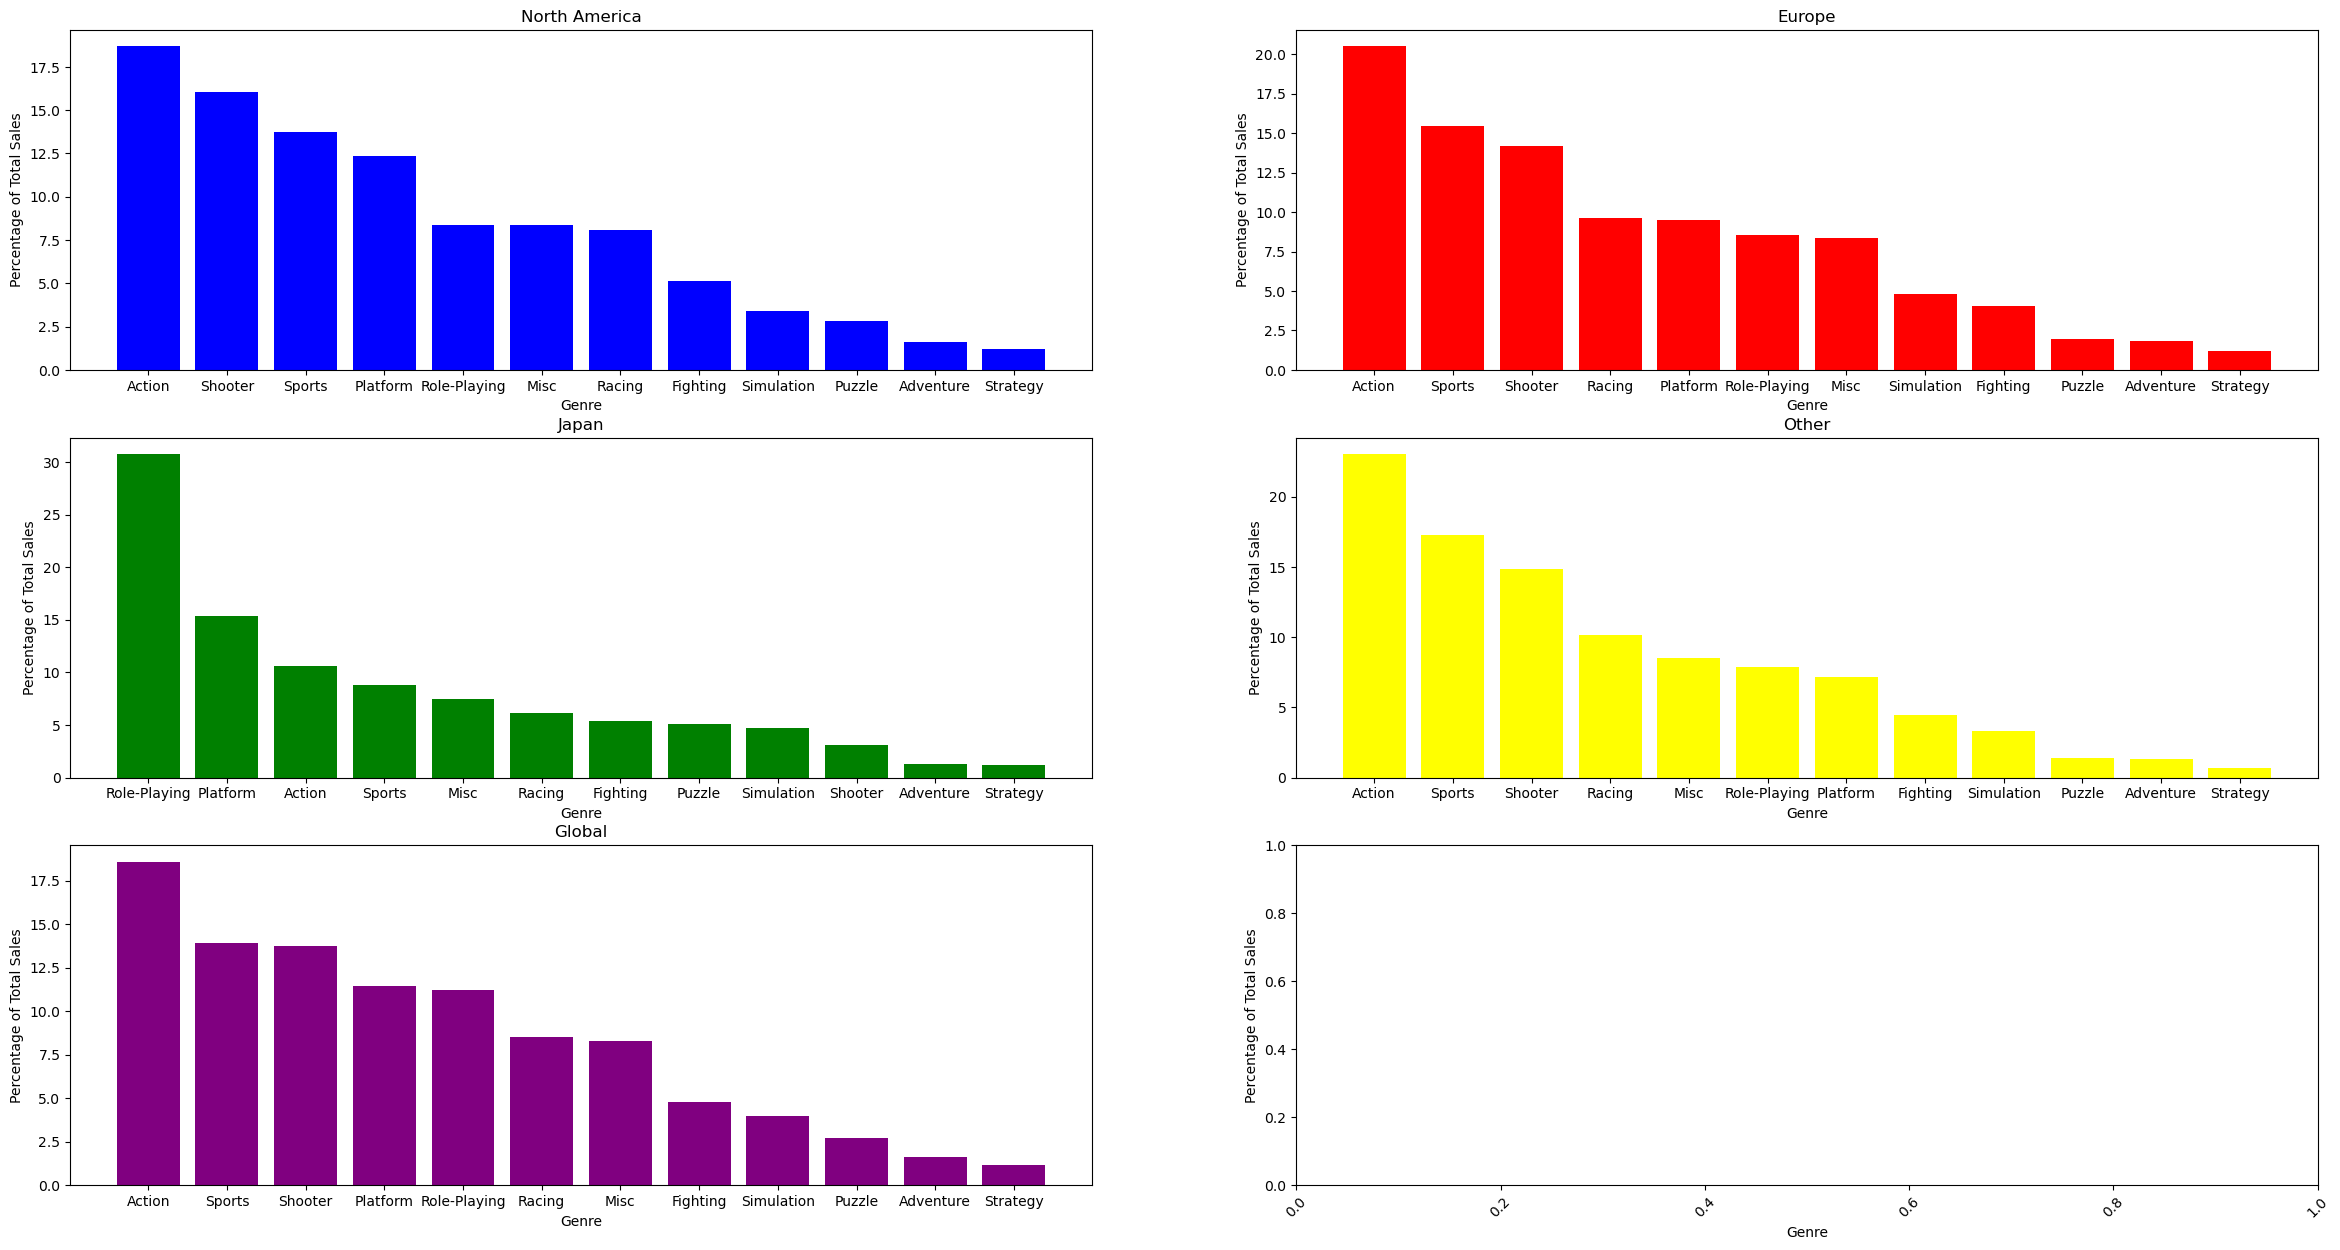

In [46]:
fig, axs = plt.subplots(3, 2, figsize=(29, 15))

axs[0, 0].bar(NA_pert_sales_genre.index, NA_pert_sales_genre.values, color = 'blue', alpha = 1)
axs[0, 0].set_title('North America')

axs[0, 1].bar(EU_pert_sales_genre.index, EU_pert_sales_genre.values, color = 'red', alpha = 1)
axs[0, 1].set_title('Europe')

axs[1, 0].bar(JP_pert_sales_genre.index, JP_pert_sales_genre.values, color = 'green', alpha = 1)
axs[1, 0].set_title('Japan')

axs[1, 1].bar(Other_pert_sales_genre.index, Other_pert_sales_genre.values, color = 'yellow', alpha = 1)
axs[1, 1].set_title('Other')

axs[2, 0].bar(Global_pert_sales_genre.index, Global_pert_sales_genre.values, color = 'purple', alpha = 1)
axs[2, 0].set_title('Global')



for ax in axs.flat:
    ax.set(xlabel='Genre', ylabel='Percentage of Total Sales')

#for ax in axs.flat:
    #ax.label_outer()

ax.tick_params(axis='x', rotation=45)    
    
plt.show()

Top per territory:

NA                      
    1: Action                 
    2: Shooter              
    3: Sports                
    4: Platform                  
    5: Role-Playing               

EU                      
    1: Action                  
    2: Sports              
    3: Shooter          
    4: Racing              
    5: Platform                

JP                              
    1: RPG                              
    2: Platform                       
    3: Action                     
    4: Sports                   
    5: Misc                           

Other               
    1: Action            
    2: Sports           
    3: Shooter             
    4: Racing           
    5: Misc              

Global 
    1: Action     
    2: Sports
    3: Shooter 
    4: Platform 
    5: RPG


Critic and User Scores for Genres: what is their relation to sales?

In [6]:
clean_game_sales_df = game_sales_df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Critic_Score','Critic_Count','User_Score','User_Count']].dropna(how = 'any')

clean_game_sales_df['User_Score'] = pd.to_numeric(clean_game_sales_df['User_Score'], errors='coerce')

clean_game_sales_df['User_Score'] = clean_game_sales_df['User_Score']*10
#clean_game_sales_df['User_Count'] = clean_game_sales_df['User_Count']/10


#user weight variables 
total_user_count = clean_game_sales_df['User_Count'].sum()
avg_user_count_per_genre = clean_game_sales_df.groupby('Genre')['User_Count'].mean()

avg_user_score_per_genre = clean_game_sales_df.groupby('Genre')['User_Score'].mean()

#user critic variables 
total_critic_count = clean_game_sales_df['Critic_Count'].sum()
avg_critic_count_per_genre = clean_game_sales_df.groupby('Genre')['Critic_Count'].mean()

avg_critic_score_per_genre = clean_game_sales_df.groupby('Genre')['Critic_Score'].mean()

#user score is an object so need to change it to a numeric value
#print(clean_game_sales_df['User_Score'].dtype)



genre_clean_score_df = clean_game_sales_df.groupby('Genre').mean()

genre_clean_score_df['Weighted_Critic_Score'] = avg_critic_score_per_genre * avg_critic_count_per_genre/total_critic_count

genre_clean_score_df['Weighted_User_Score'] = avg_user_score_per_genre * avg_user_count_per_genre/total_user_count

# axis=1 means drop columns, 0 would be rows
#genre_clean_score_df =  genre_clean_score_df.drop(['Critic_Score','Critic_Count','User_Score','User_Count'], axis = 1)
genre_clean_score_df


# essentially  we are taking each genre's weighted score and their normalized score is based on their percentage corresponding to the weighted max a score can be they can achieve
max_weighted_critic_score = genre_clean_score_df['Weighted_Critic_Score'].max()
max_weighted_user_score = genre_clean_score_df['Weighted_User_Score'].max()
genre_clean_score_df['Normalized_Weighted_Critic_Score'] = genre_clean_score_df['Weighted_Critic_Score'] / max_weighted_critic_score * 100
genre_clean_score_df['Normalized_Weighted_User_Score'] = genre_clean_score_df['Weighted_User_Score'] / max_weighted_user_score * 100

genre_clean_score_df =  genre_clean_score_df.drop(['Critic_Count','User_Count','Weighted_Critic_Score','Weighted_User_Score'], axis = 1)
genre_clean_score_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,Normalized_Weighted_Critic_Score,Normalized_Weighted_User_Score
Genre,,,,,,,,
Action,1.263397,0.881079,0.142762,0.346667,79.622222,76.863492,82.864224,57.190137
Adventure,0.968750,0.750000,0.223750,0.250625,79.562500,78.812500,100.000000,82.716542
Fighting,1.102667,0.519733,0.234000,0.223600,80.626667,79.986667,76.847808,16.524992
Misc,1.716768,0.993131,0.299293,0.322626,73.171717,71.474747,55.429992,5.757946
Platform,1.475426,0.911596,0.406170,0.257660,77.074468,78.702128,72.023211,31.257627
Puzzle,1.066190,0.948095,0.580952,0.222381,77.857143,80.000000,76.699376,7.103116
Racing,1.342119,1.018644,0.223136,0.379407,78.728814,77.042373,70.955714,18.559210
Role-Playing,1.164228,0.679024,0.658862,0.219675,83.024390,79.577236,89.019323,100.000000
Shooter,1.694049,0.969268,0.068878,0.333561,80.936585,72.668293,92.091426,83.516401


Interesting notes:

- Highest Normalized Weighted Critics scores:
    1: Adventure (100)
    2: Strategy (93.76)
    3: Shooter (92.1)

- Highest Normalized Weighted Users scores:
    1: RPGs (100)
    2: Strategy (94.4)
    3: Shooter (83.52)

- The normalized considers both the average score per genre as well as teh number of users/critics who contributed to either groups score.
- This suggest that these genres are consistently well-rated across a large number of users and critics (depending on which group the genre fell under). This makes it a more reliable choice for high ratings.
  - Basically these are genres with high ratings given a large number of user or critics respectively.
  - It is a good quality to measure a genre's popularity and/or quality as it's less likely to be skewed but outlier ratings

- The common genres well rated by both Critics and Users are Stratgey and Shooters. This may imply that they may have a common framework of criterea to judge on for both Users and Critics.
- It could also imply that they just have broad appeal amoungst both groups.


The r-squared is: 0.7259732942803178


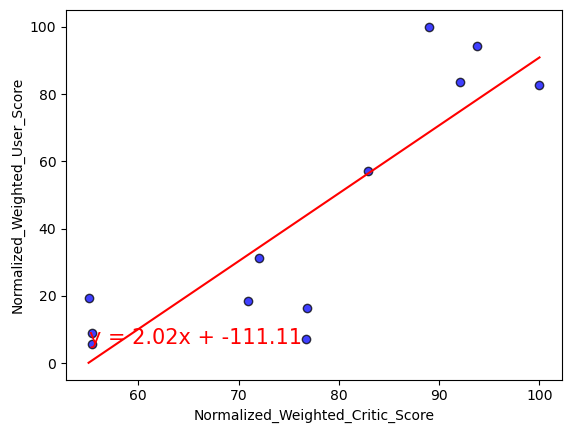

In [47]:
sorted_critic_score_df = genre_clean_score_df.sort_values(by='Normalized_Weighted_Critic_Score', ascending=False)

sorted_user_score_df = genre_clean_score_df.sort_values(by='Normalized_Weighted_User_Score', ascending=False)

def regress(x,y,x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, marker = 'o', facecolors = 'blue', edgecolors = 'black', alpha =0.75)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(min(x),min(y)),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()
    
x = sorted_critic_score_df['Normalized_Weighted_Critic_Score']
y = sorted_critic_score_df['Normalized_Weighted_User_Score']

regress(x,y,'Normalized_Weighted_Critic_Score','Normalized_Weighted_User_Score')


The r-squared is: 0.7259732942803178


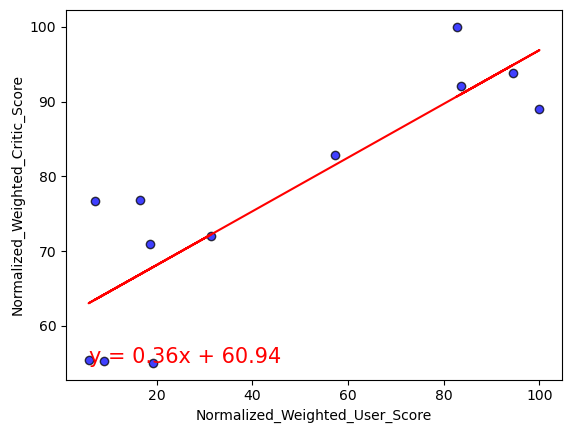

In [48]:
regress(y,x,'Normalized_Weighted_User_Score','Normalized_Weighted_Critic_Score')

These two linear regression give us the same r-squared value of of .726 (about 73%) - this means that we can use either score to make a reasonably good guess on what the other would be. 

There is still about 27% if the variance in both scores that's unexplained by the other, which could be due to other factors [expanded on below].

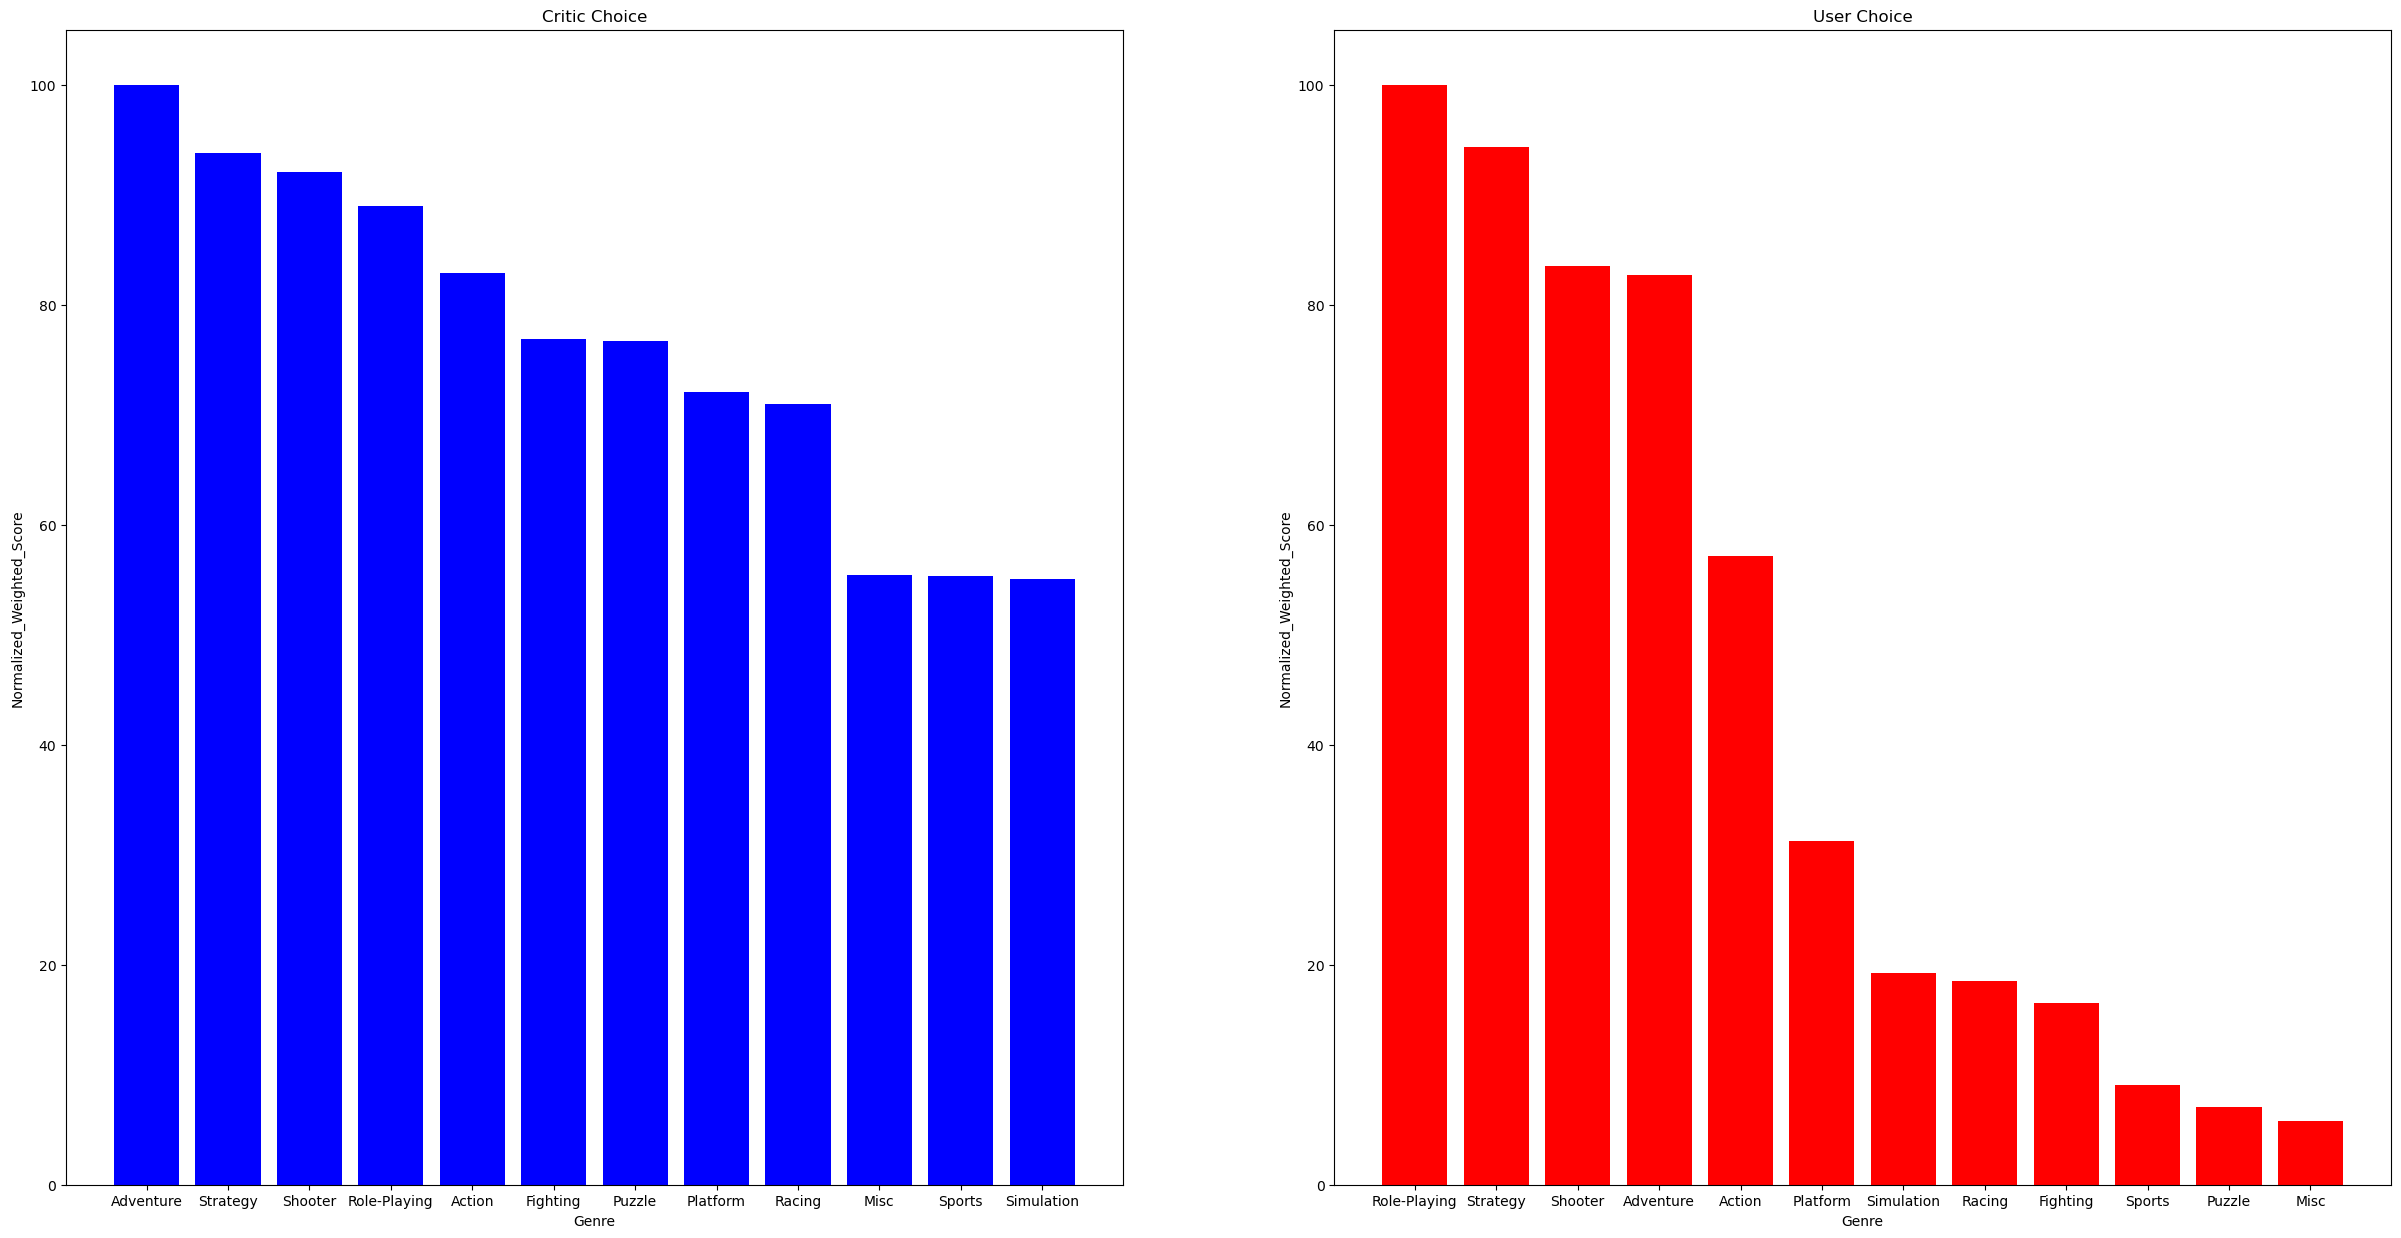

In [8]:
# Visual: Normalized Critic and User scores per genre

sorted_critic_score_df = genre_clean_score_df.sort_values(by='Normalized_Weighted_Critic_Score', ascending=False)

sorted_user_score_df = genre_clean_score_df.sort_values(by='Normalized_Weighted_User_Score', ascending=False)



fig, axs = plt.subplots(1, 2, figsize=(30, 15))

axs[0].bar(sorted_critic_score_df.index, sorted_critic_score_df['Normalized_Weighted_Critic_Score'], color = 'blue', alpha = 1)
axs[0].set_title('Critic Choice')

axs[1].bar(sorted_user_score_df.index, sorted_user_score_df['Normalized_Weighted_User_Score'], color = 'red', alpha = 1)
axs[1].set_title('User Choice')




for ax in axs.flat:
    ax.set(xlabel='Genre', ylabel='Normalized_Weighted_Score')

plt.show()

Interesting notes:

- After the first four genres for both groups (same genres though different order), the crtics seems to give a higher normalized weighted score when compared to the Users' normalized score:

        1: Do critics have a more consistant framework that they can apply better across all genre of games?
            - the r-squared value does say that 27% of the variance is due to other factors.

        2: When it comes ot sports, puzzle, and misc genre games, their normalized Users scores are very low- if there are alot of games in the market under these genres, are Users more critical since they need to decide whether to purchase the game or not?
            - Under this train of thought: there are a lot of Shooters in the market, yet both groups give them high ratings- further implying a more broad appeal

        3: Since Critics, I assume, are given free access to the games, yet Users have to purchase them- does this factor weigh more when Users score a game?

        4: When did each group review the game and does this affect the rating?
            example: If a game came out in 2001, critics usually just review the game when it comes out, when users ten years in the future can review an older game- so this may skew their opinion (and the score). Nostaligia may make the user give the game a higher score, or the diffrence in techonoly make make the user give the game a lower score etc. 
       
        5: Strategy have nearly identical normalized weighted User and critic scores, does this imply that Users and Crtics have a similar slate of criteria that they evaluate these games with? Less affacted by certain factors like time and technology?

        6: Conspiracy thought: Do overall high normalized weighted scores for Critics mean they are more influced by developers and publishers? i.e. are they recieving kick-backs for more favorable reviews? 

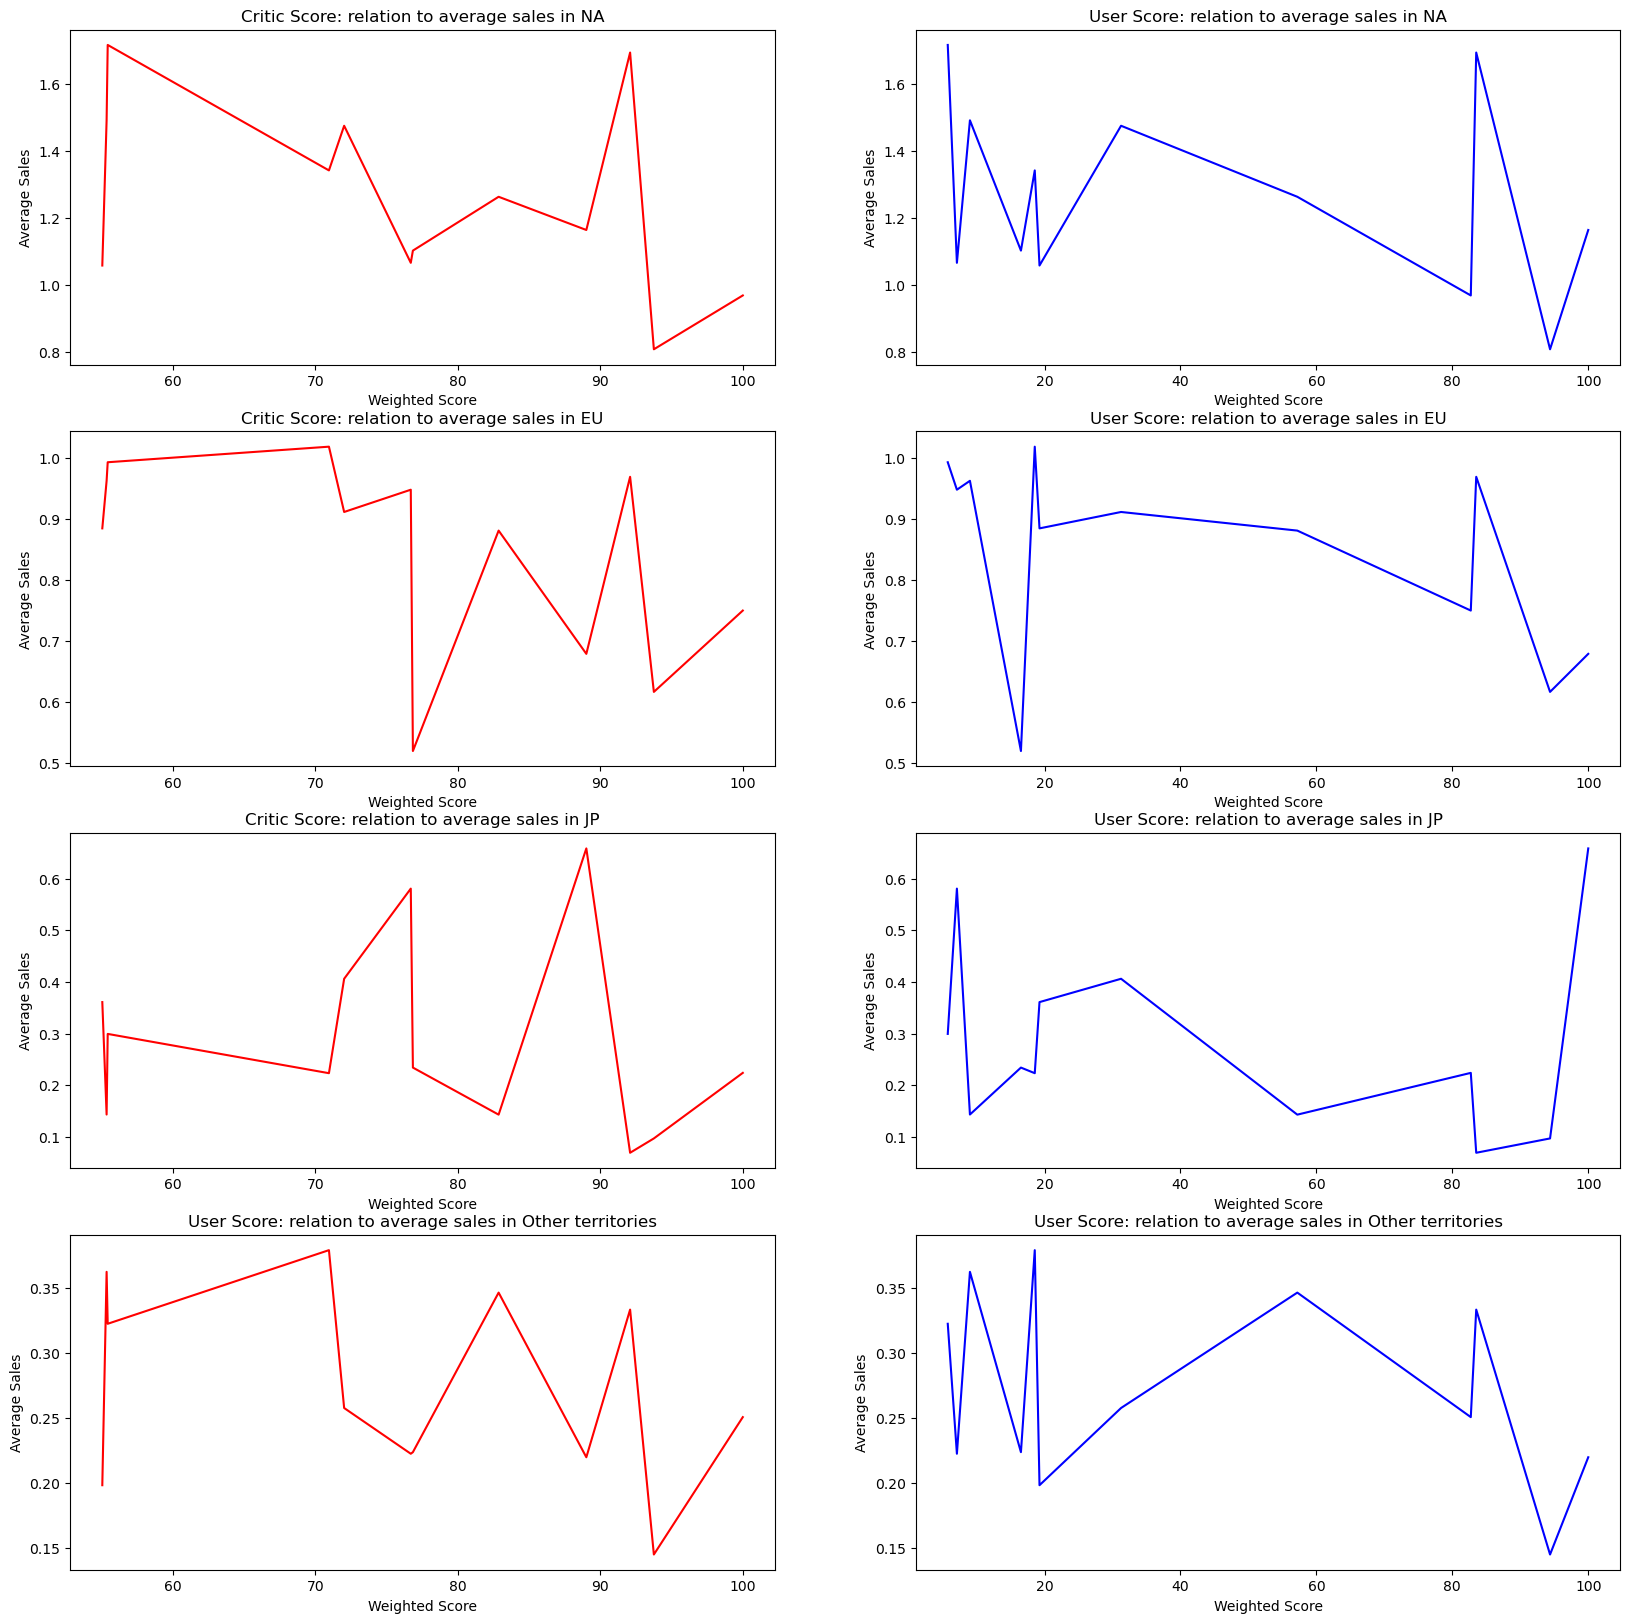

In [9]:
# Average sales in relation to normalized weighted critic and user scores within territories

fig, axs = plt.subplots(4, 2, figsize=(20, 20))

axs[0, 0].plot(sorted_critic_score_df['Normalized_Weighted_Critic_Score'], sorted_critic_score_df['NA_Sales'], color = 'red', alpha = 1)
axs[0, 0].set_title('Critic Score: relation to average sales in NA')

axs[0, 1].plot(sorted_user_score_df['Normalized_Weighted_User_Score'], sorted_user_score_df['NA_Sales'], color = 'blue', alpha = 1)
axs[0, 1].set_title('User Score: relation to average sales in NA')

axs[1, 0].plot(sorted_critic_score_df['Normalized_Weighted_Critic_Score'], sorted_critic_score_df['EU_Sales'], color = 'red', alpha = 1)
axs[1, 0].set_title('Critic Score: relation to average sales in EU')

axs[1, 1].plot(sorted_user_score_df['Normalized_Weighted_User_Score'], sorted_user_score_df['EU_Sales'], color = 'blue', alpha = 1)
axs[1, 1].set_title('User Score: relation to average sales in EU')

axs[2, 0].plot(sorted_critic_score_df['Normalized_Weighted_Critic_Score'], sorted_critic_score_df['JP_Sales'], color = 'red', alpha = 1)
axs[2, 0].set_title('Critic Score: relation to average sales in JP')

axs[2, 1].plot(sorted_user_score_df['Normalized_Weighted_User_Score'], sorted_user_score_df['JP_Sales'], color = 'blue', alpha = 1)
axs[2, 1].set_title('User Score: relation to average sales in JP')

axs[3, 0].plot(sorted_critic_score_df['Normalized_Weighted_Critic_Score'], sorted_critic_score_df['Other_Sales'], color = 'red', alpha = 1)
axs[3, 0].set_title('User Score: relation to average sales in Other territories')

axs[3, 1].plot(sorted_user_score_df['Normalized_Weighted_User_Score'], sorted_user_score_df['Other_Sales'], color = 'blue', alpha = 1)
axs[3, 1].set_title('User Score: relation to average sales in Other territories')

for ax in axs.flat:
    ax.set(xlabel='Weighted Score', ylabel='Average Sales')

The r-squared is: 0.17698626768327966


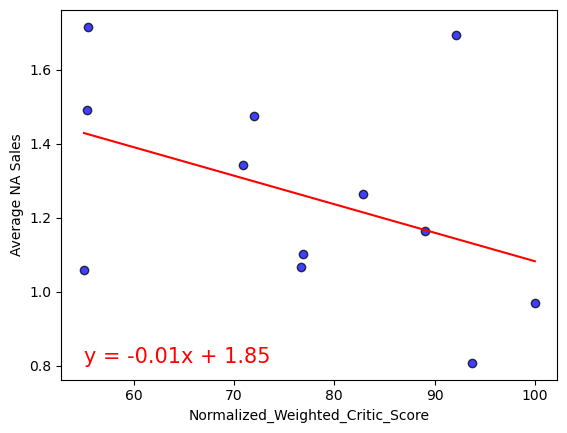

None
The r-squared is: 0.09538252787869399


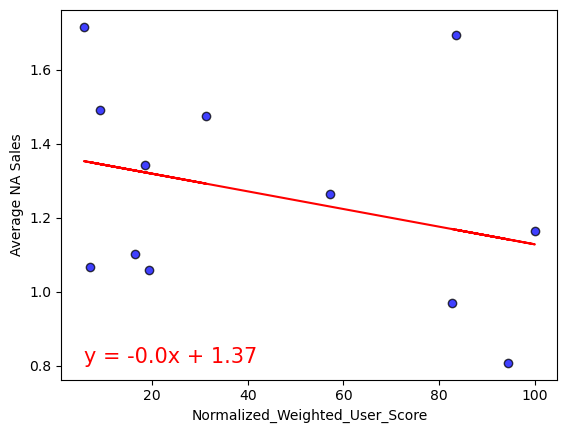

None


In [10]:
def regress(x,y,x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, marker = 'o', facecolors = 'blue', edgecolors = 'black', alpha =0.75)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(min(x),min(y)),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()
    
x = sorted_critic_score_df['Normalized_Weighted_Critic_Score']
y = sorted_critic_score_df['NA_Sales']

print(regress(x,y,'Normalized_Weighted_Critic_Score','Average NA Sales'))

x_user = sorted_critic_score_df['Normalized_Weighted_User_Score']
y_user = sorted_critic_score_df['NA_Sales']

print(regress(x_user,y_user,'Normalized_Weighted_User_Score','Average NA Sales'))

This means that about 17.7% of the variability in 'Average NA Sales' can be explained by 'Normalized_Weighted_Critic_Score'. Since it is very low it does not explain a large portion of the variance in the sales data.

Explains even less when looking at the 'Normalized_Weighted_User_Score' (9.5%)

Age Ratings per Genre: looking at sale totals

In [11]:
new_clean_game_sales_df = game_sales_df[['Rating', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','Global_Sales']].dropna(how = 'any')
genre_ratings = new_clean_game_sales_df.groupby(['Rating','Genre'])[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()
genre_ratings_df = pd.DataFrame(genre_ratings)

genre_ratings_df.reset_index(level='Genre', inplace=True)
genre_ratings_df.reset_index(level='Rating', inplace=True)


# ratings with highest counts
genre_ratings_new = genre_ratings_df.loc[(genre_ratings_df['Rating'] == 'E') | (genre_ratings_df['Rating'] == 'E10+') 
                                         | (genre_ratings_df['Rating'] == 'T') 
                                         | (genre_ratings_df['Rating'] == 'M'), :]


genre_ratings_new

/var/folders/6x/3m8fj7gd27z3h9zd6jxjf16w0000gn/T/ipykernel_50454/652419684.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genre_ratings = new_clean_game_sales_df.groupby(['Rating','Genre'])[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()


,Rating,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,E,Action,52.20,34.54,6.75,8.70,102.18
2,E,Adventure,14.75,8.20,0.57,1.93,25.43
3,E,Misc,92.69,66.01,27.14,17.00,202.85
4,E,Platform,126.84,76.14,36.26,20.00,259.27
5,E,Puzzle,19.67,13.96,9.03,3.18,45.87
6,E,Racing,113.15,87.06,22.99,31.93,255.14
7,E,Role-Playing,26.71,10.12,17.55,2.33,56.68
8,E,Simulation,35.29,30.27,16.93,7.39,89.88
9,E,Sports,271.42,182.76,28.27,70.80,553.32
10,E,Strategy,6.28,1.16,1.12,0.29,8.86


In [12]:

E_genre_df = genre_ratings_new.loc[(genre_ratings_new['Rating'] == 'E'),:]
E10_genre_df = genre_ratings_new.loc[(genre_ratings_new['Rating'] == 'E10+'),:]
T_genre_df = genre_ratings_new.loc[(genre_ratings_new['Rating'] == 'T'),:]
M_genre_df = genre_ratings_new.loc[(genre_ratings_new['Rating'] == 'M'),:]

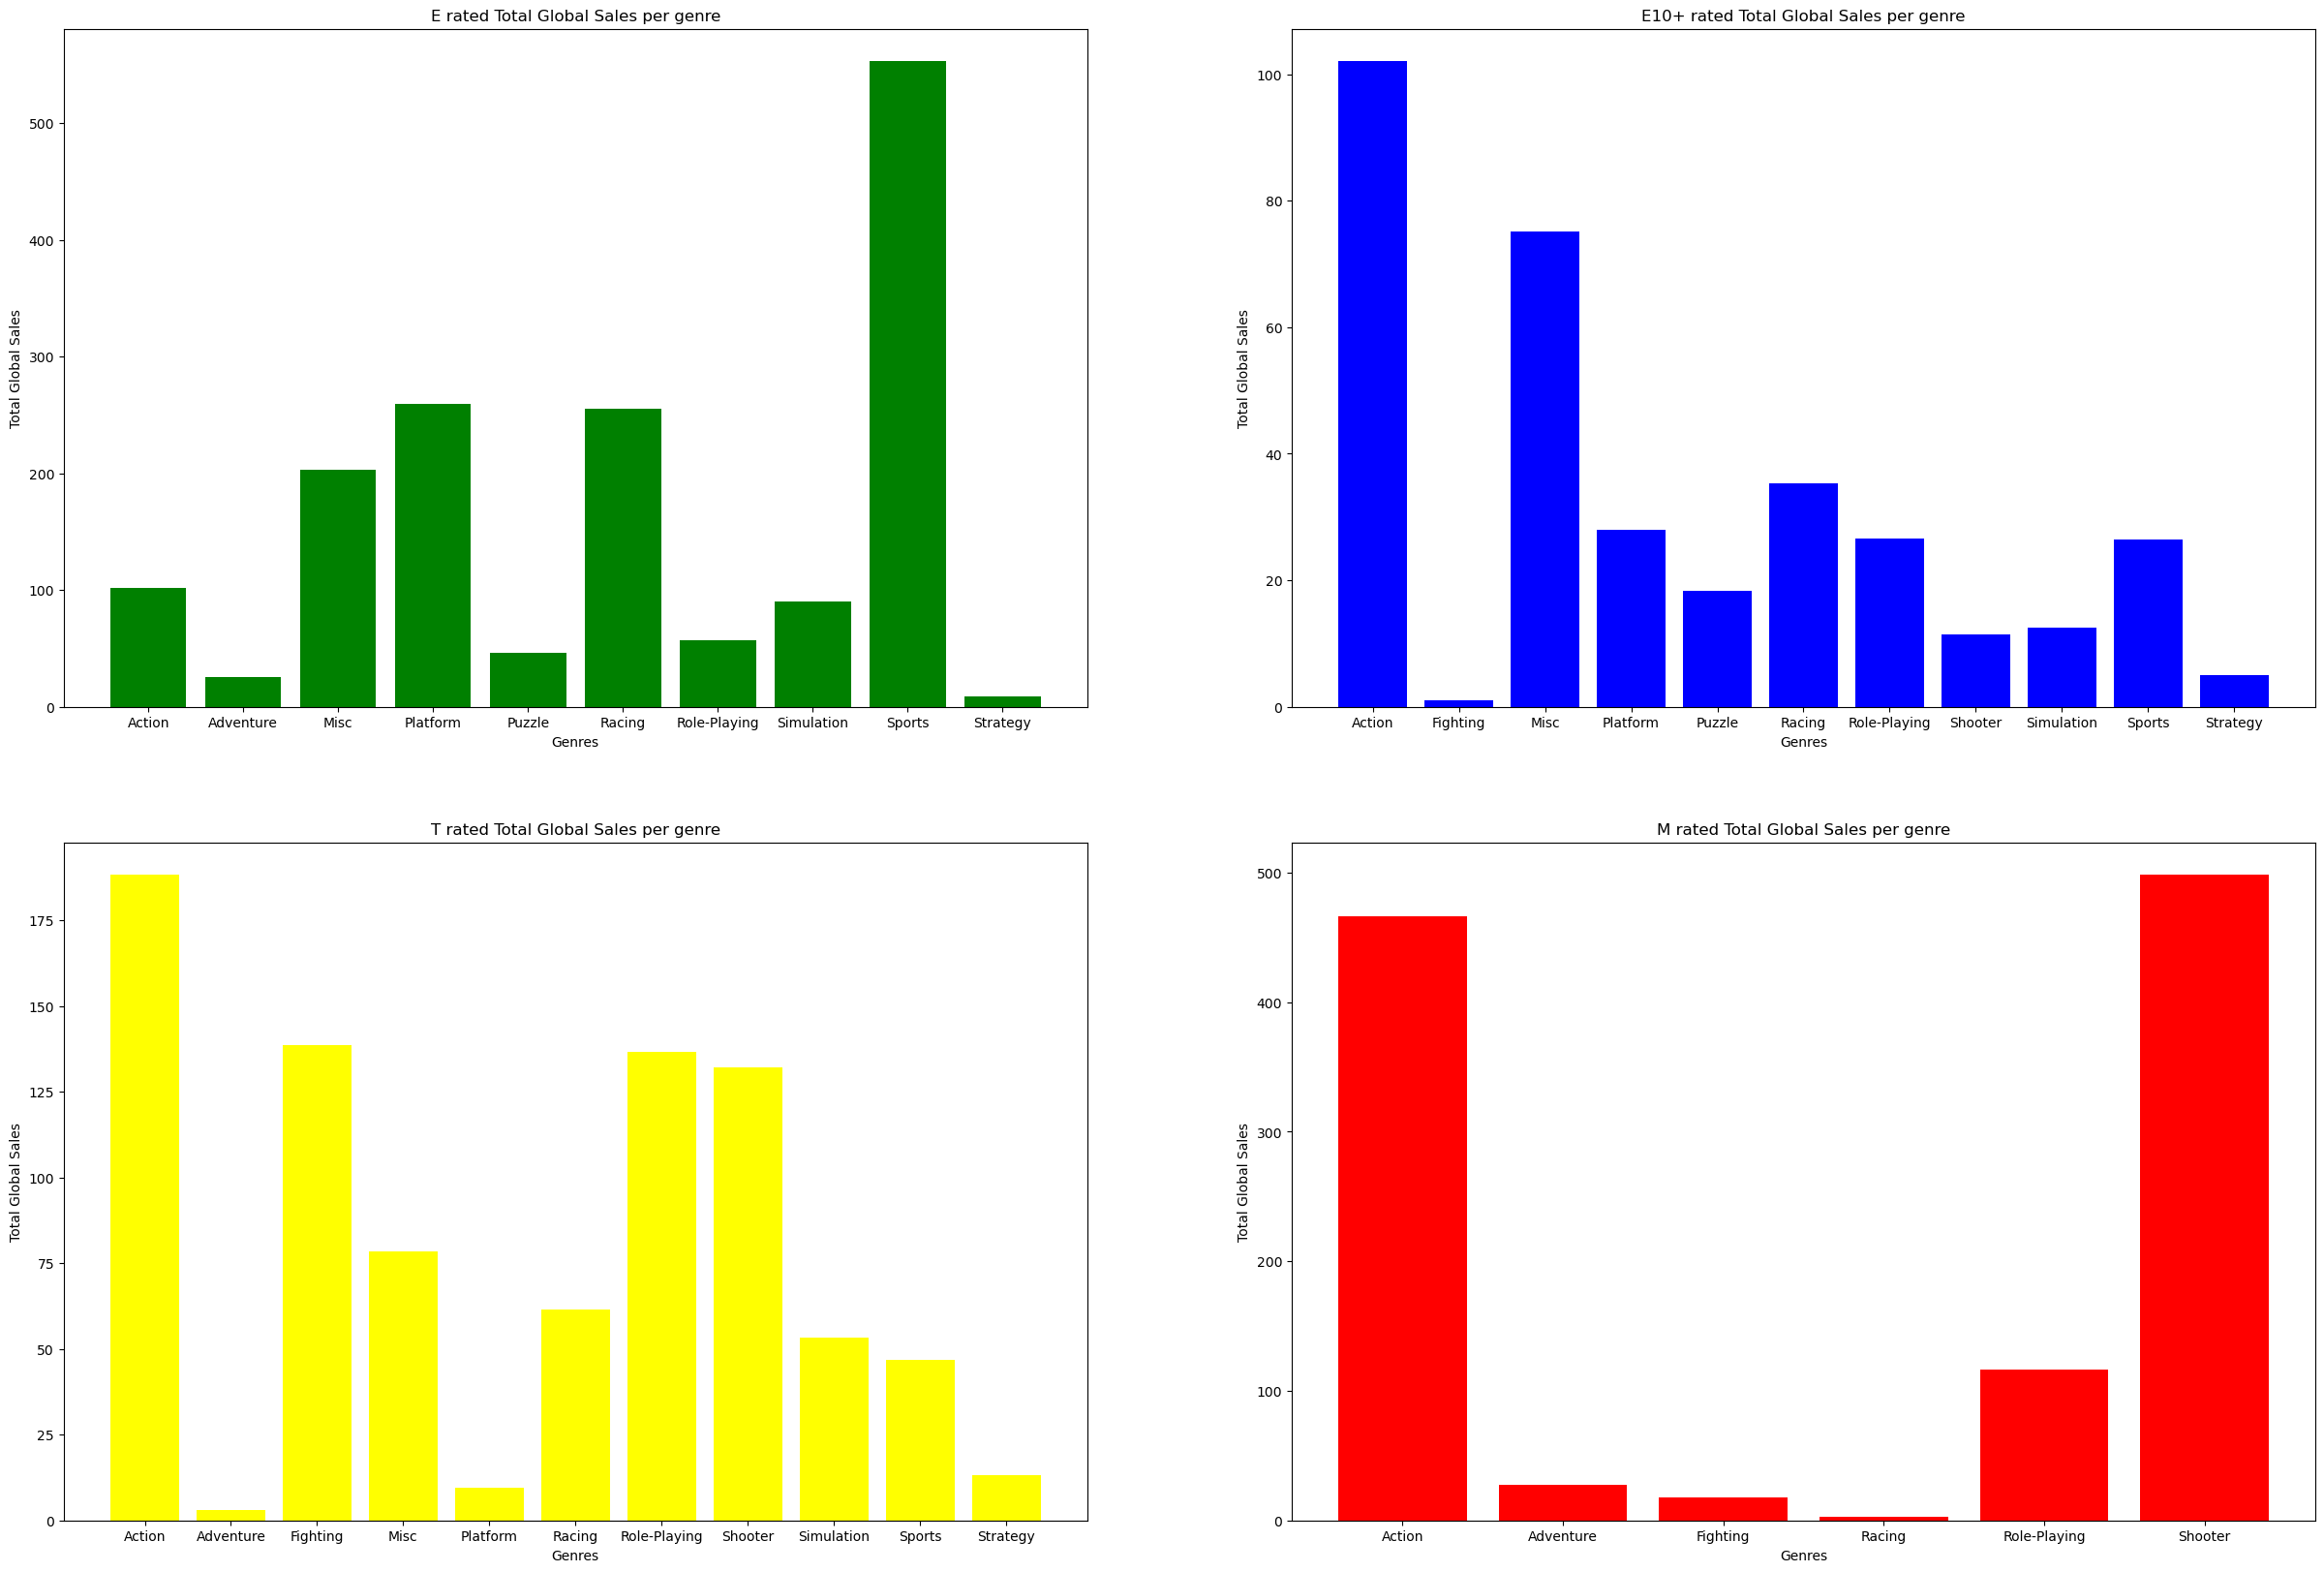

<Figure size 640x480 with 0 Axes>

In [13]:
# Total Global Sales per Genre for each of the top 4 age ratings

fig, axs = plt.subplots(2, 2, figsize=(30, 20))

axs[0, 0].bar(E_genre_df['Genre'], E_genre_df['Global_Sales'], color = 'green', alpha = 1)
axs[0, 0].set_title('E rated Total Global Sales per genre')

axs[0, 1].bar(E10_genre_df['Genre'], E10_genre_df['Global_Sales'], color = 'blue', alpha = 1)
axs[0, 1].set_title('E10+ rated Total Global Sales per genre')

axs[1, 0].bar(T_genre_df['Genre'], T_genre_df['Global_Sales'], color = 'yellow', alpha = 1)
axs[1, 0].set_title('T rated Total Global Sales per genre')

axs[1, 1].bar(M_genre_df['Genre'], M_genre_df['Global_Sales'], color = 'red', alpha = 1)
axs[1, 1].set_title('M rated Total Global Sales per genre')


for ax in axs.flat:
    ax.set(xlabel='Genres', ylabel='Total Global Sales')


plt.show()
plt.tight_layout()

The graphs above is good when asking what game genre does best if the primary goal is selling it to a certain audiance  that purchases a particular rated game:

For example, if we want to sell a game marketed towards a Mature audiance we would want to focus on 3 genres:
- Shooter
- Action
- RPGs

Interesting enough, Sports does best when it is an E rating, as well as dominating the E rating for all genres, this could imply:
- Sports with less physical contact may be  preferred over sports with more physical contact 
  - soccor over football
- Wii Sports may skew this heavily

-Also ther eis a smaller pool of genres under the M rating
- Action consistently sells high in 3 out of the 4 ratings

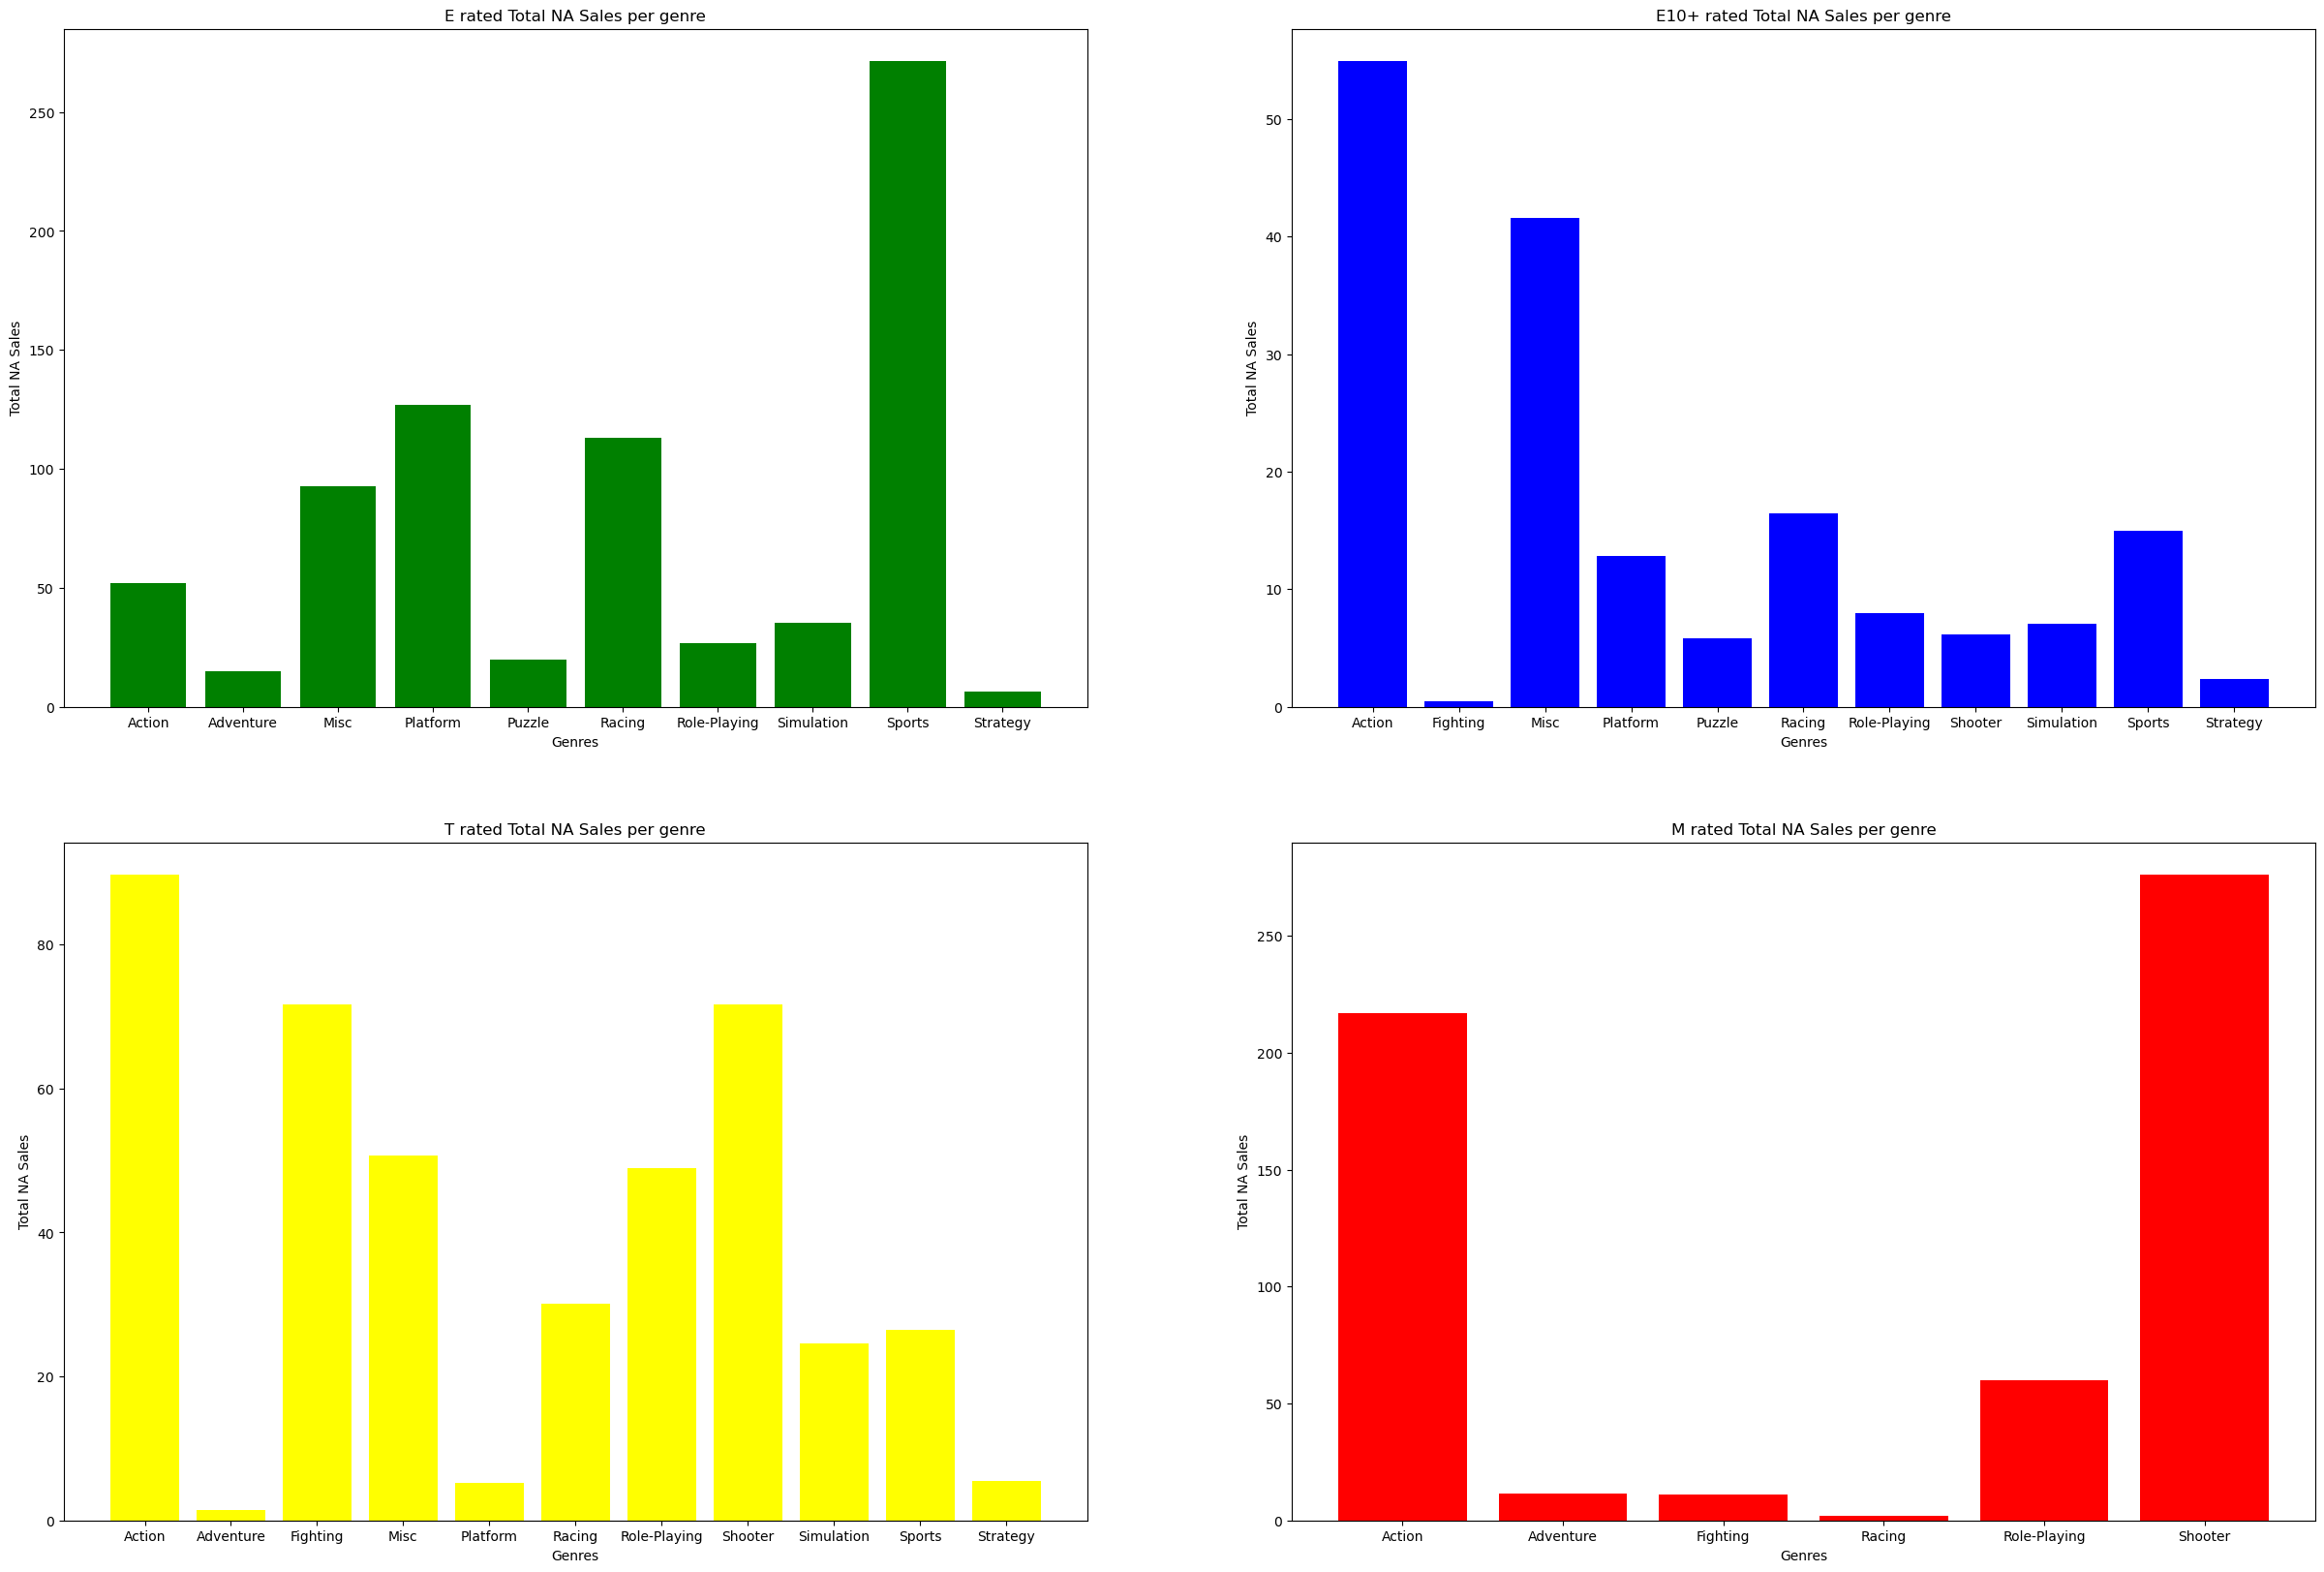

<Figure size 640x480 with 0 Axes>

In [14]:
# Total NA Sales per Genre for each of the top 4 age ratings

fig, axs = plt.subplots(2, 2, figsize=(30, 20))

axs[0, 0].bar(E_genre_df['Genre'], E_genre_df['NA_Sales'], color = 'green', alpha = 1)
axs[0, 0].set_title('E rated Total NA Sales per genre')

axs[0, 1].bar(E10_genre_df['Genre'], E10_genre_df['NA_Sales'], color = 'blue', alpha = 1)
axs[0, 1].set_title('E10+ rated Total NA Sales per genre')

axs[1, 0].bar(T_genre_df['Genre'], T_genre_df['NA_Sales'], color = 'yellow', alpha = 1)
axs[1, 0].set_title('T rated Total NA Sales per genre')

axs[1, 1].bar(M_genre_df['Genre'], M_genre_df['NA_Sales'], color = 'red', alpha = 1)
axs[1, 1].set_title('M rated Total NA Sales per genre')


for ax in axs.flat:
    ax.set(xlabel='Genres', ylabel='Total NA Sales')


plt.show()
plt.tight_layout()

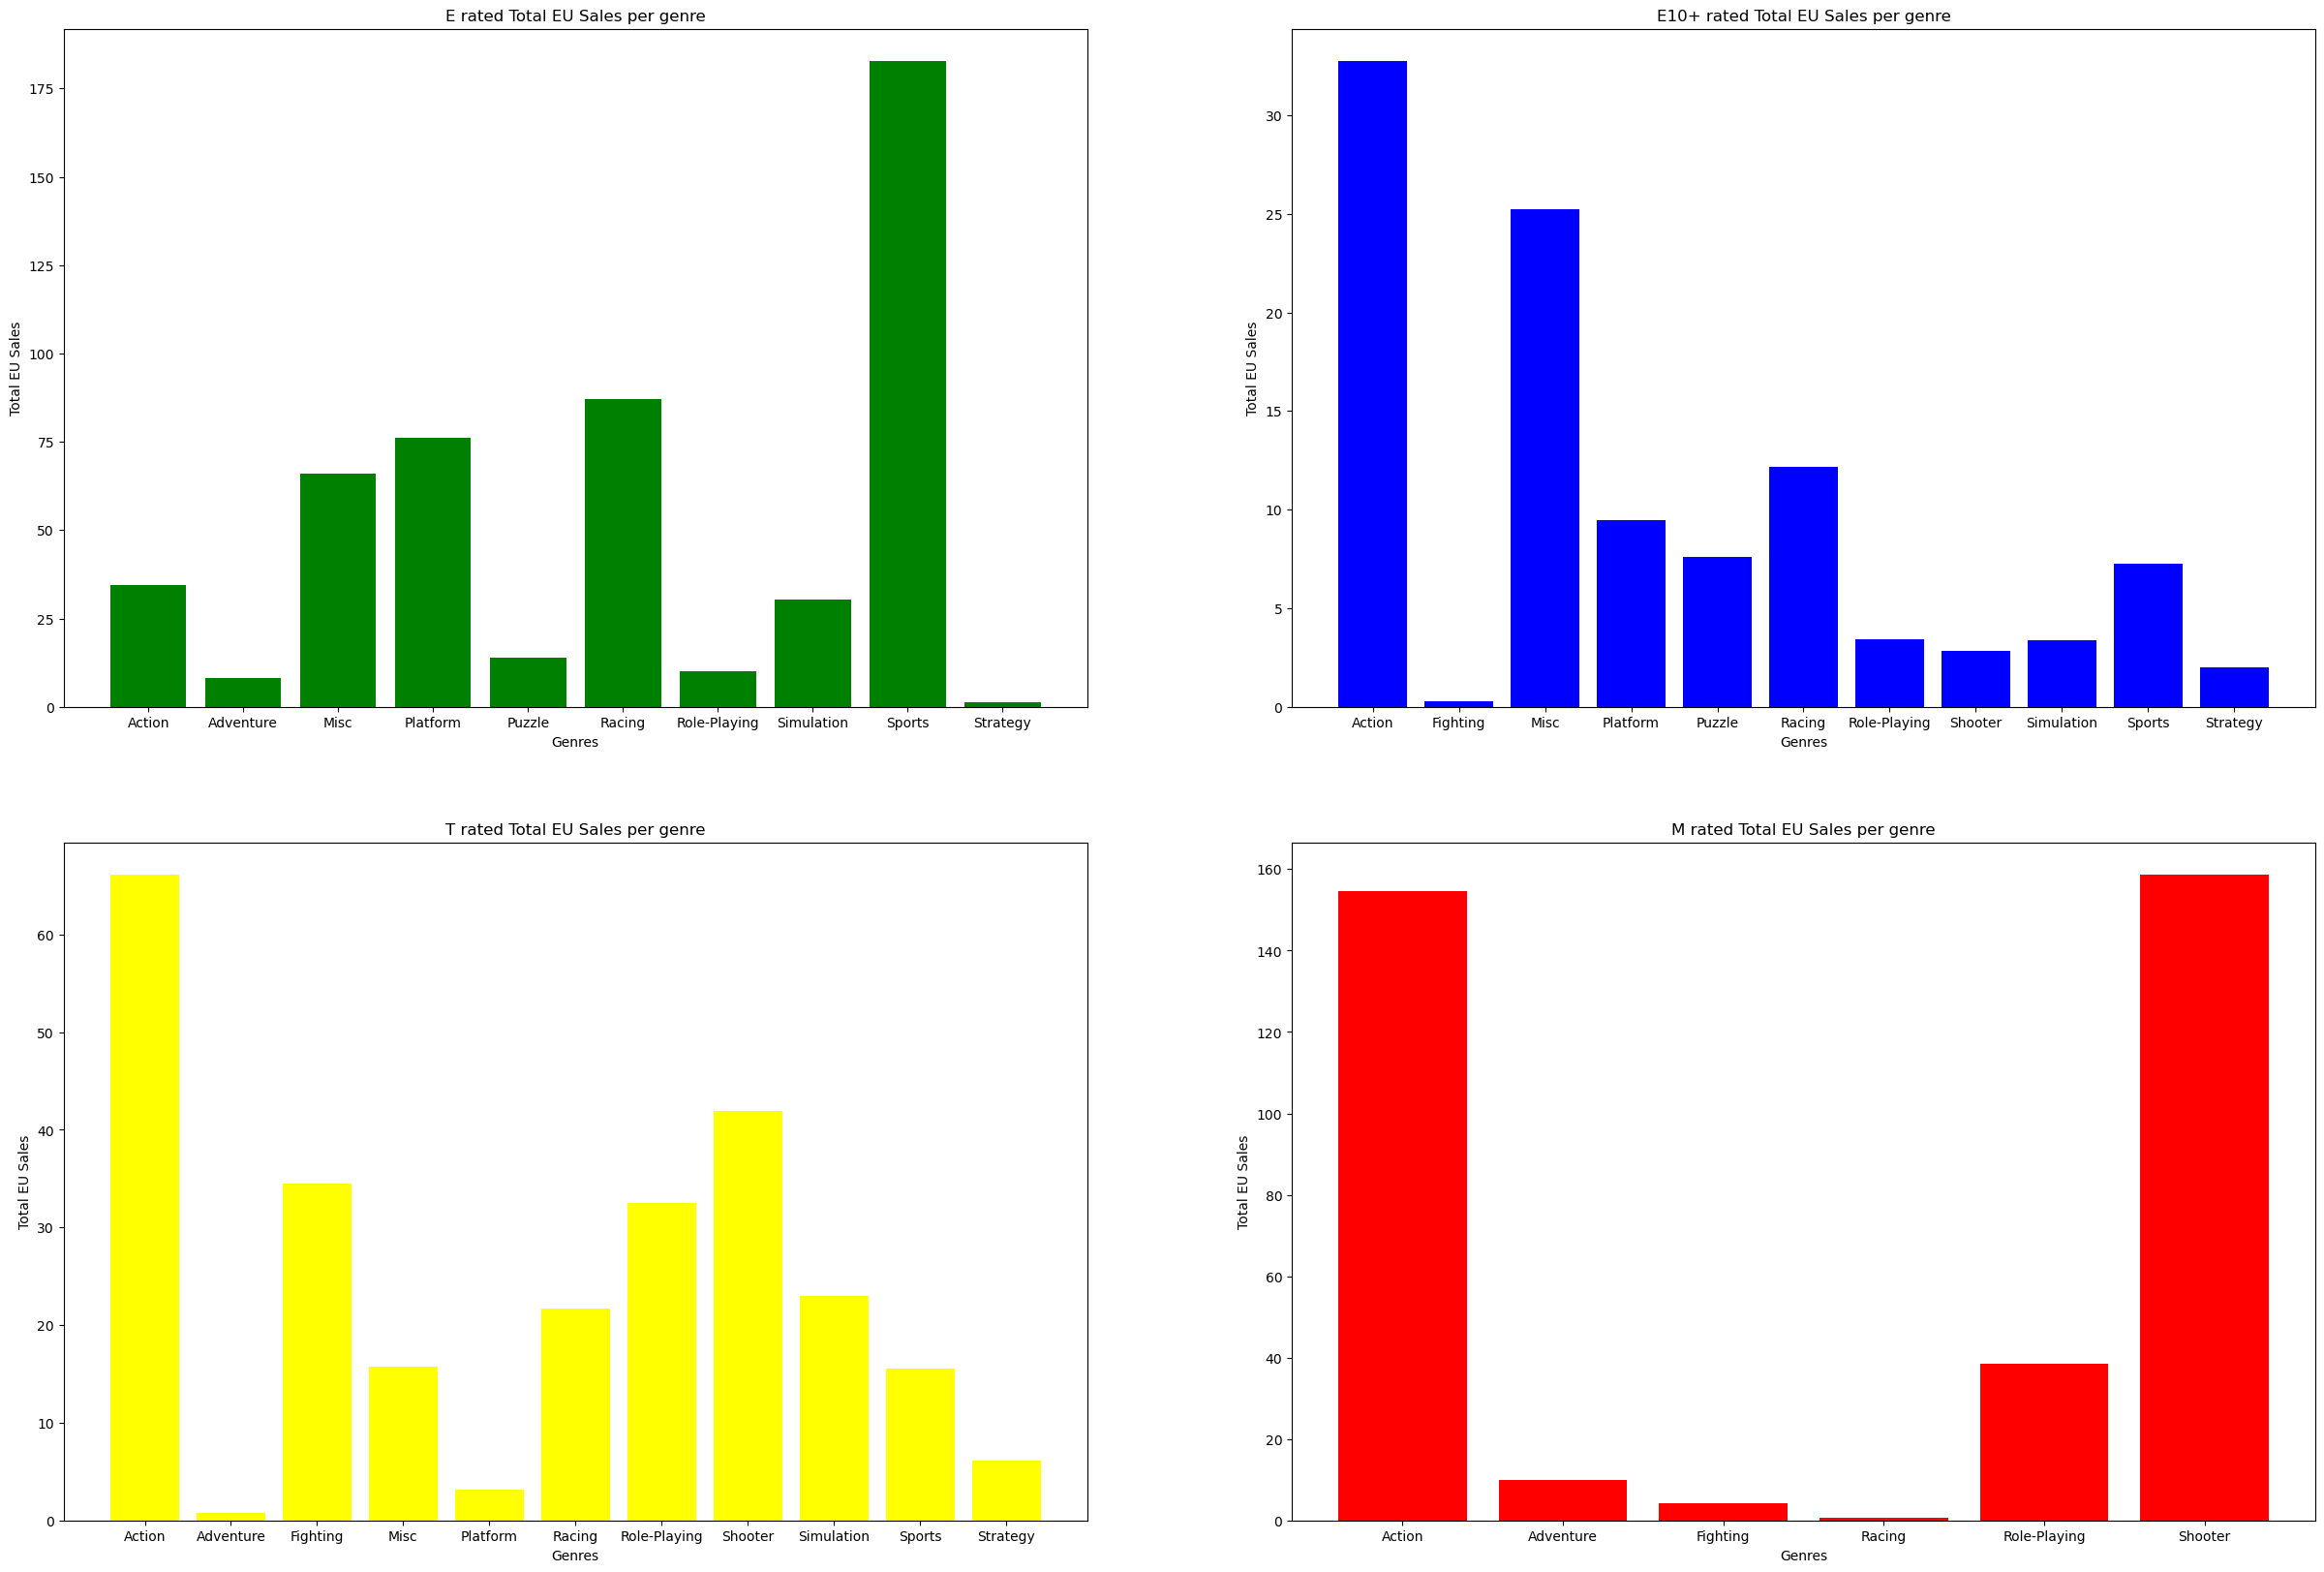

<Figure size 640x480 with 0 Axes>

In [15]:
# Total EU Sales per Genre for each of the top 4 age ratings

fig, axs = plt.subplots(2, 2, figsize=(30, 20))

axs[0, 0].bar(E_genre_df['Genre'], E_genre_df['EU_Sales'], color = 'green', alpha = 1)
axs[0, 0].set_title('E rated Total EU Sales per genre')

axs[0, 1].bar(E10_genre_df['Genre'], E10_genre_df['EU_Sales'], color = 'blue', alpha = 1)
axs[0, 1].set_title('E10+ rated Total EU Sales per genre')

axs[1, 0].bar(T_genre_df['Genre'], T_genre_df['EU_Sales'], color = 'yellow', alpha = 1)
axs[1, 0].set_title('T rated Total EU Sales per genre')

axs[1, 1].bar(M_genre_df['Genre'], M_genre_df['EU_Sales'], color = 'red', alpha = 1)
axs[1, 1].set_title('M rated Total EU Sales per genre')


for ax in axs.flat:
    ax.set(xlabel='Genres', ylabel='Total EU Sales')


plt.show()
plt.tight_layout()

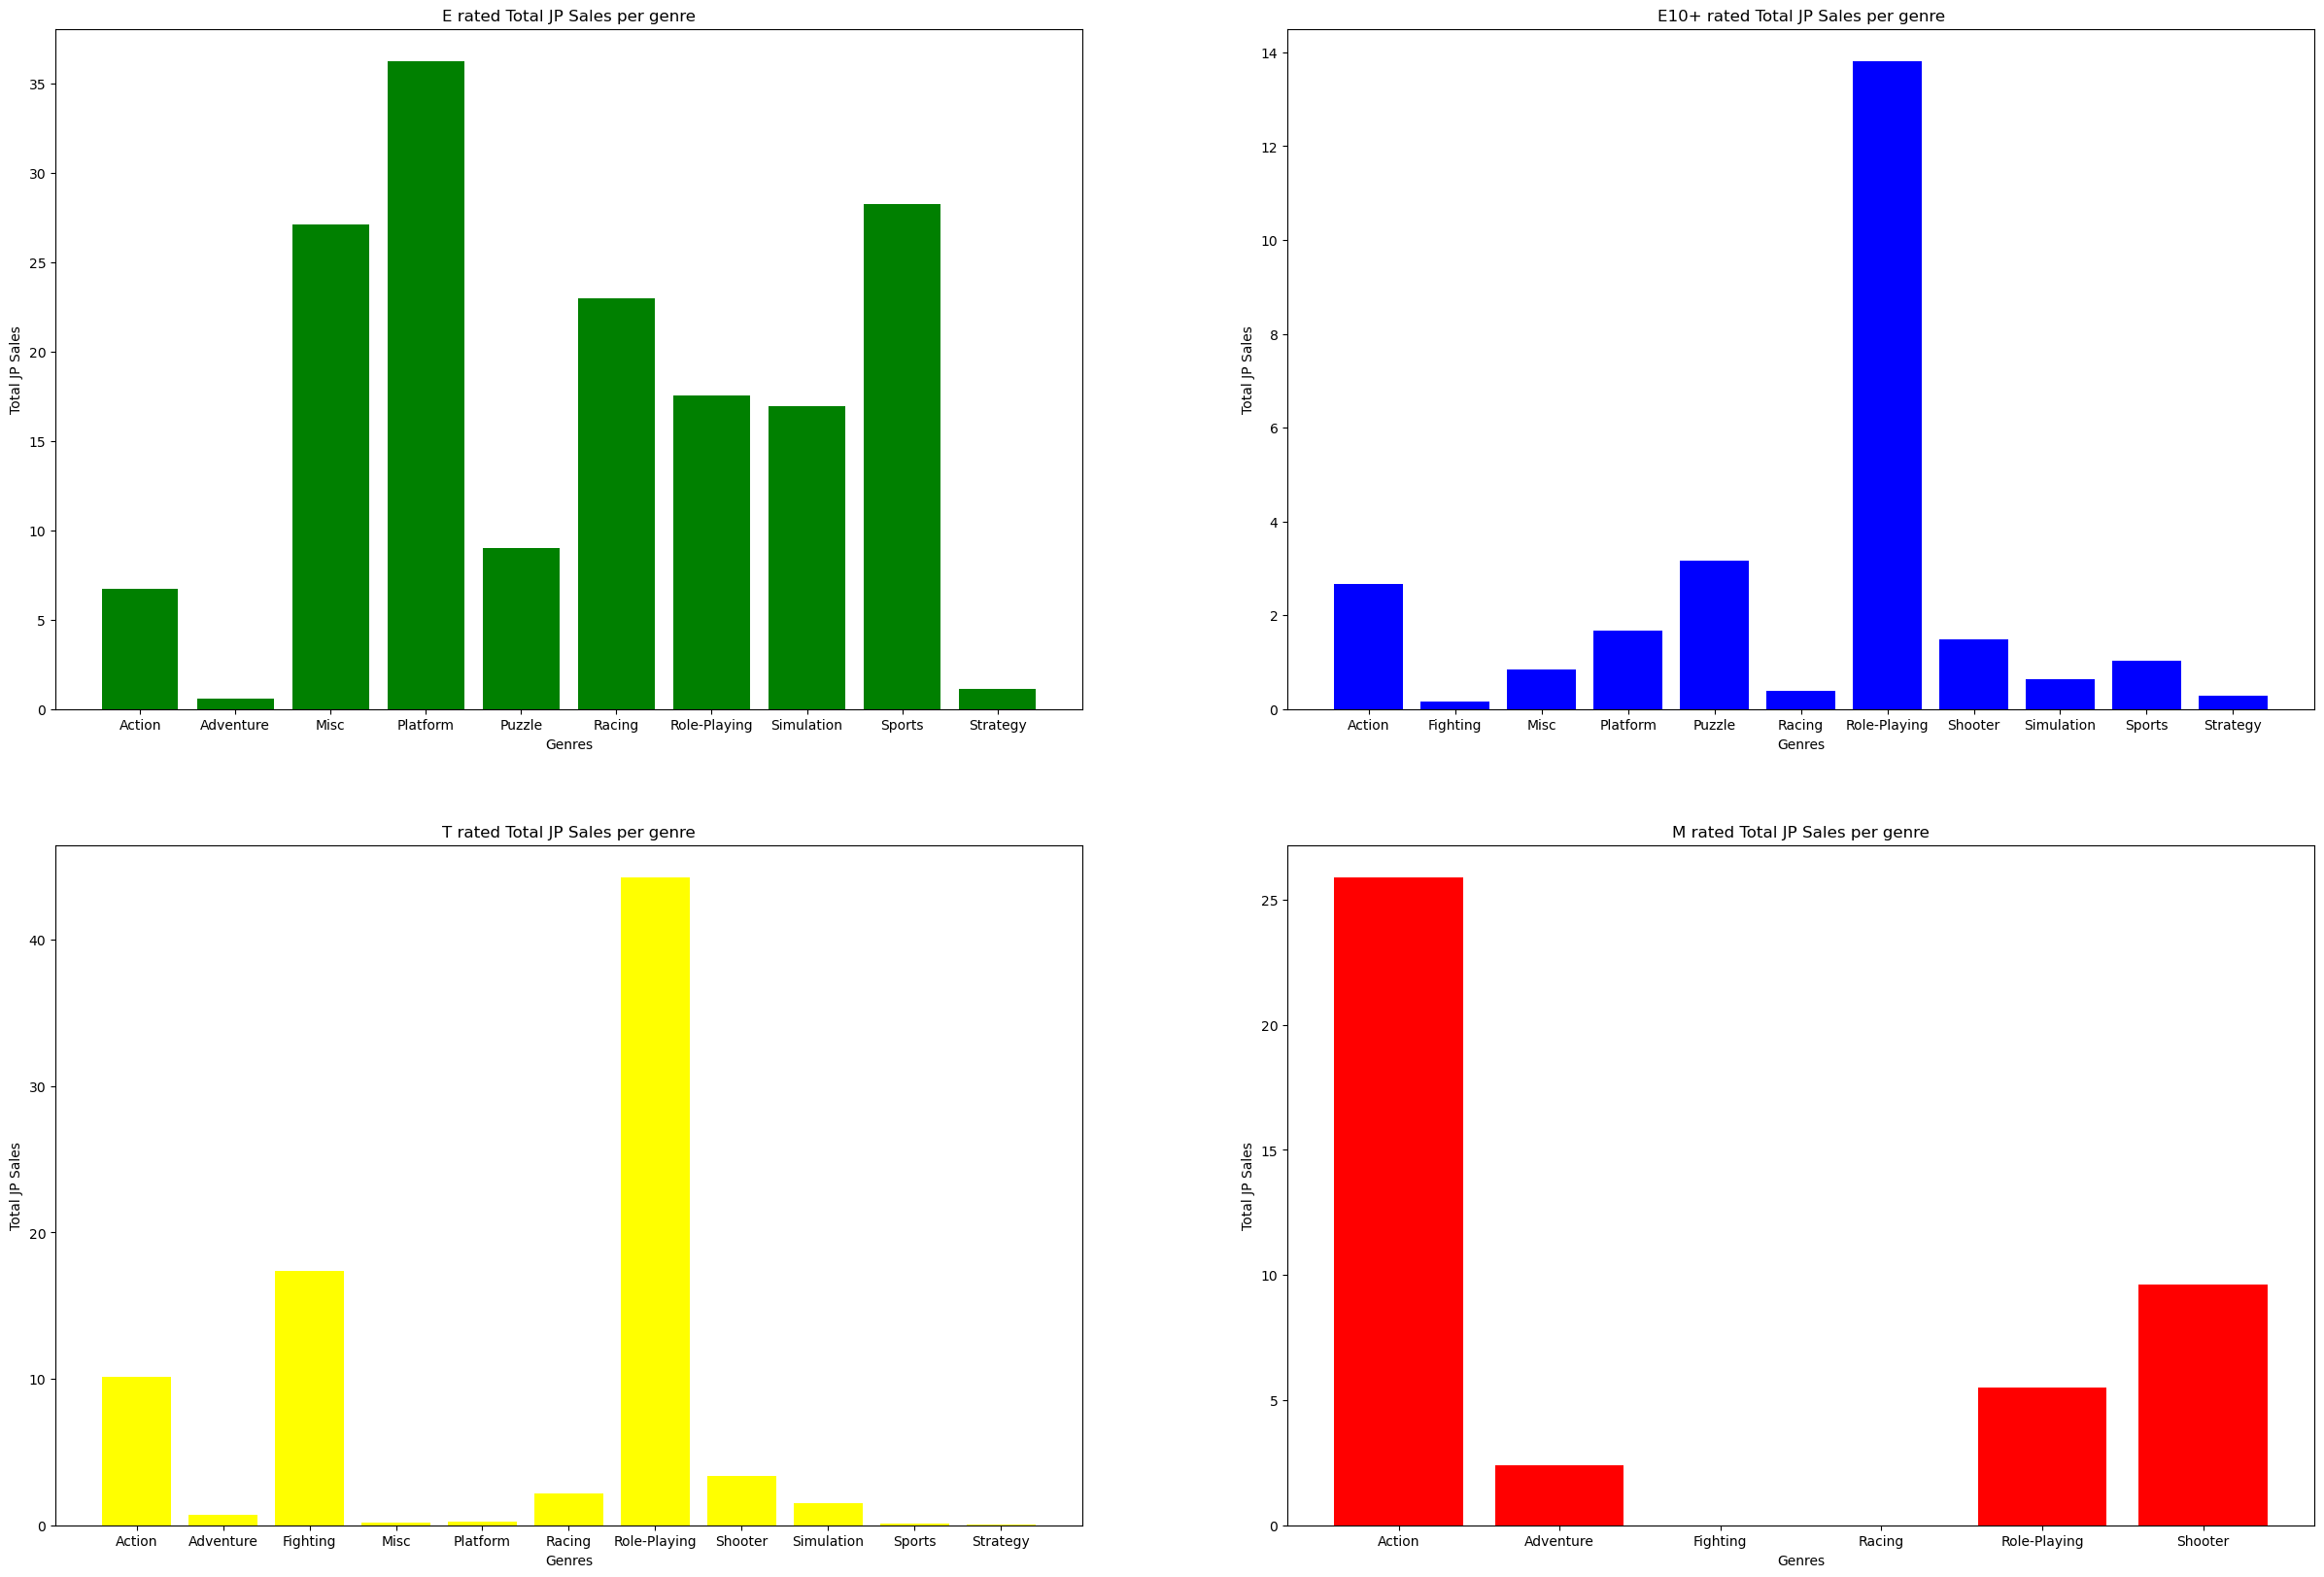

<Figure size 640x480 with 0 Axes>

In [16]:
# Total JP Sales per Genre for each of the top 4 age ratings

fig, axs = plt.subplots(2, 2, figsize=(30, 20))

axs[0, 0].bar(E_genre_df['Genre'], E_genre_df['JP_Sales'], color = 'green', alpha = 1)
axs[0, 0].set_title('E rated Total JP Sales per genre')

axs[0, 1].bar(E10_genre_df['Genre'], E10_genre_df['JP_Sales'], color = 'blue', alpha = 1)
axs[0, 1].set_title('E10+ rated Total JP Sales per genre')

axs[1, 0].bar(T_genre_df['Genre'], T_genre_df['JP_Sales'], color = 'yellow', alpha = 1)
axs[1, 0].set_title('T rated Total JP Sales per genre')

axs[1, 1].bar(M_genre_df['Genre'], M_genre_df['JP_Sales'], color = 'red', alpha = 1)
axs[1, 1].set_title('M rated Total JP Sales per genre')


for ax in axs.flat:
    ax.set(xlabel='Genres', ylabel='Total JP Sales')


plt.show()
plt.tight_layout()

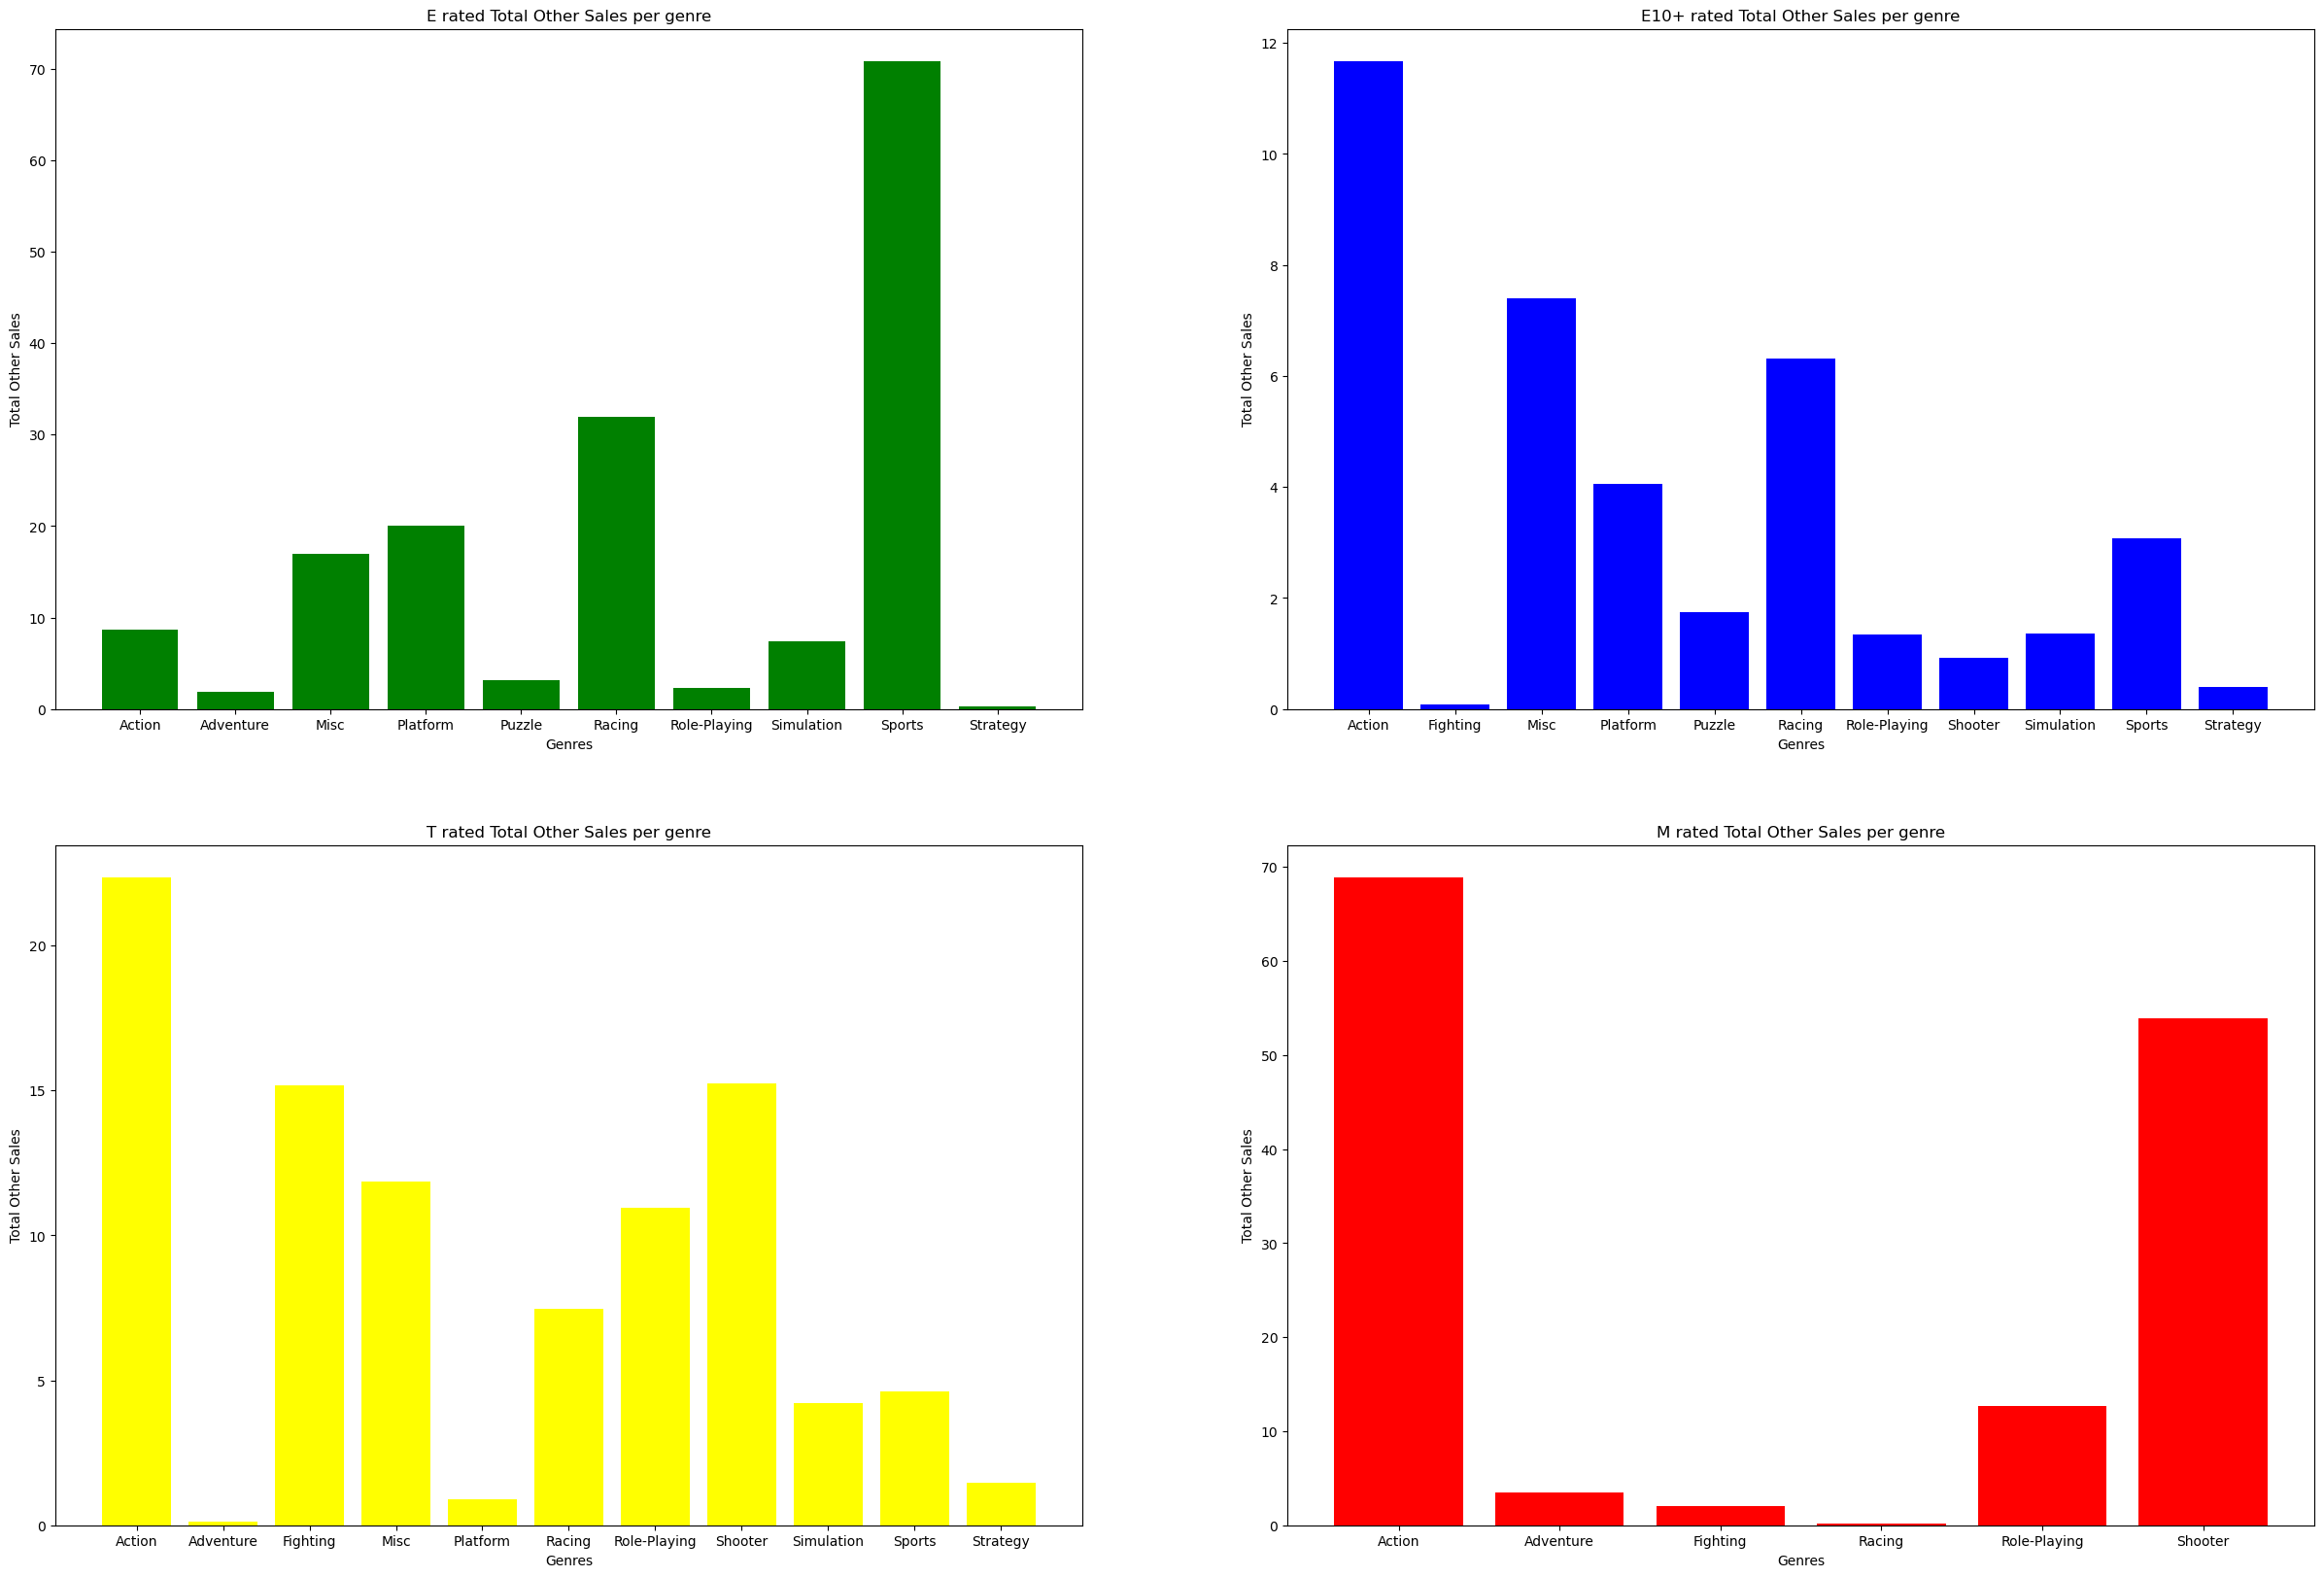

<Figure size 640x480 with 0 Axes>

In [17]:
# Total Other Sales per Genre for each of the top 4 age ratings
fig, axs = plt.subplots(2, 2, figsize=(30, 20))

axs[0, 0].bar(E_genre_df['Genre'], E_genre_df['Other_Sales'], color = 'green', alpha = 1)
axs[0, 0].set_title('E rated Total Other Sales per genre')

axs[0, 1].bar(E10_genre_df['Genre'], E10_genre_df['Other_Sales'], color = 'blue', alpha = 1)
axs[0, 1].set_title('E10+ rated Total Other Sales per genre')

axs[1, 0].bar(T_genre_df['Genre'], T_genre_df['Other_Sales'], color = 'yellow', alpha = 1)
axs[1, 0].set_title('T rated Total Other Sales per genre')

axs[1, 1].bar(M_genre_df['Genre'], M_genre_df['Other_Sales'], color = 'red', alpha = 1)
axs[1, 1].set_title('M rated Total Other Sales per genre')


for ax in axs.flat:
    ax.set(xlabel='Genres', ylabel='Total Other Sales')


plt.show()
plt.tight_layout()

In [50]:
# Top Genres for global_based on weighted normalized average sales per genre
Top_genre_ratings_df = genre_ratings_new.loc[(genre_ratings_new['Genre'] == 'Action')
                      |(genre_ratings_new['Genre'] == 'Sports')
                      |(genre_ratings_new['Genre'] == 'Role-Playing')
                      |(genre_ratings_new['Genre'] == 'Shooter')
                      |(genre_ratings_new['Genre'] == 'Platform'),:]

Top_genre_ratings_df

,Rating,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,E,Action,52.20,34.54,6.75,8.70,102.18
4,E,Platform,126.84,76.14,36.26,20.00,259.27
7,E,Role-Playing,26.71,10.12,17.55,2.33,56.68
9,E,Sports,271.42,182.76,28.27,70.80,553.32
11,E10+,Action,54.94,32.75,2.66,11.67,102.06
14,E10+,Platform,12.80,9.46,1.68,4.05,27.97
17,E10+,Role-Playing,7.98,3.43,13.81,1.34,26.53
18,E10+,Shooter,6.13,2.83,1.49,0.92,11.38
20,E10+,Sports,15.00,7.28,1.03,3.08,26.39
24,M,Action,216.97,154.65,25.89,68.89,466.39


In [51]:
Top_genre_ratings_df.groupby('Rating').mean()

/var/folders/6x/3m8fj7gd27z3h9zd6jxjf16w0000gn/T/ipykernel_50454/2068961201.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_genre_ratings_df.groupby('Rating').mean()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rating,,,,,
E,119.292500,75.890000,22.2075,25.457500,242.862500
E10+,19.370000,11.150000,4.1340,4.212000,38.866000
M,184.386667,117.233333,13.6700,45.163333,360.436667
T,48.404000,31.852000,11.6280,10.806000,102.644000


In [52]:
# Stat analysis for Global Sales per genre
Global_stat = game_sales_df.groupby('Genre')['Global_Sales'].agg(['mean', 'median', 'var', 'std', 'sem'])
Global_stat = Global_stat.reset_index()
Global_stat

,Genre,mean,median,var,std,sem
0,Action,2.523420,1.710,5.552342,2.356341,0.114841
1,Adventure,2.228293,1.660,3.173930,1.781553,0.278232
2,Fighting,2.190000,1.590,2.631023,1.622043,0.145080
3,Misc,2.796213,1.860,11.205643,3.347483,0.257499
4,Platform,3.363918,1.805,22.650711,4.759276,0.341696
5,Puzzle,2.845455,1.680,19.183410,4.379887,0.590584
6,Racing,2.665549,1.555,13.511150,3.675752,0.272465
7,Role-Playing,3.163251,1.860,13.841767,3.720452,0.261125
8,Shooter,3.069062,1.835,10.412048,3.226770,0.201673
9,Simulation,2.437419,1.690,8.464939,2.909457,0.301697


In [53]:
from scipy import stats

# Checking to see if for the top 5 Gernres (based on their percentage of the total Global sales) are normally distrobuted

top_global_genres = ['Shooter','Platform','Role-Playing', 'Sports', 'Action']

genre_data = []


for value in top_global_genres:
    genre_value = game_sales_df.loc[game_sales_df['Genre'] == value, 'Global_Sales']
    
    # Perform the normality test
    k2, p = stats.normaltest(genre_value)
    
    # Print the results
    print(f"Genre: {value}")
    print(f"p = {p:.2g}")
    
    # If the p-value is less than the threshold (e.g., 0.05), then we can reject the null hypothesis and assume that our data is not normally distributed.
    if p < 0.05:  
        print("The null hypothesis can be rejected. Data is not normally distributed.")
    else:
        print("The null hypothesis cannot be rejected. Data may be normally distributed.")
    print("\n")


Genre: Shooter
p = 3.2e-48
The null hypothesis can be rejected. Data is not normally distributed.


Genre: Platform
p = 8.4e-49
The null hypothesis can be rejected. Data is not normally distributed.


Genre: Role-Playing
p = 1.8e-45
The null hypothesis can be rejected. Data is not normally distributed.


Genre: Sports
p = 2e-129
The null hypothesis can be rejected. Data is not normally distributed.


Genre: Action
p = 8.2e-88
The null hypothesis can be rejected. Data is not normally distributed.




Since the data for these top 5 genres are not evenly distributed, we should look at the median instead of the mean as it will be less affected by all the outliers. 


In [54]:
top_global_genres = ['Shooter','Platform','Role-Playing','Sports', 'Action']

genre_data = []


for value in top_global_genres:
    genre_value = game_sales_df.loc[game_sales_df['Genre'] == value, 'Global_Sales']
    genre_data.append(genre_value)



for value_2, genre in zip(genre_data, top_global_genres): 
    quartiles = value_2.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = value_2[(value_2< lower_bound) | (value_2> upper_bound)]

    print(f"Genre: {genre}")
    Total = game_sales_df.loc[game_sales_df['Genre'] == genre, 'Global_Sales'].count()
    print(f'Total number of games in this Genre: {Total}')
    print(f"Lower Quartile: {lowerq}")
    lower_quartile_count = game_sales_df.loc[(game_sales_df['Genre'] == genre) & (game_sales_df['Global_Sales'] <= lowerq), 'Global_Sales'].count()
    print(f"Number of games in lower quartile: {lower_quartile_count}")
    print(f"Upper Quartile: {upperq}")
    upper_quartile_count = game_sales_df.loc[(game_sales_df['Genre'] == genre) & (game_sales_df['Global_Sales'] <= upperq), 'Global_Sales'].count()
    print(f"Number of games in upper quartile: {upper_quartile_count}")
    print(f"IQR: {iqr}")
    print(f"Value below {lower_bound} could be an outlier")
    print(f"Value above: {upper_bound} could be an outlier")
    if outliers.empty:
        print('No potential outliers')
    else: 
        print(f'Potential Outliers: {outliers} ')
    
    print('__________________________________________________')





Genre: Shooter
Total number of games in this Genre: 256
Lower Quartile: 1.34
Number of games in lower quartile: 67
Upper Quartile: 3.355
Number of games in upper quartile: 192
IQR: 2.0149999999999997
Value below -1.6824999999999994 could be an outlier
Value above: 6.3774999999999995 could be an outlier
Potential Outliers: 9      28.31
29     14.73
31     14.63
32     14.61
34     13.79
35     13.67
36     13.47
37     13.32
41     12.63
44     12.12
55     10.60
60     10.25
64      9.86
66      9.71
69      9.36
70      9.31
78      8.49
82      8.09
87      7.98
92      7.66
99      7.39
100     7.38
101     7.32
104     7.17
114     6.83
117     6.75
120     6.68
129     6.43
Name: Global_Sales, dtype: float64 
__________________________________________________
Genre: Platform
Total number of games in this Genre: 194
Lower Quartile: 1.2925
Number of games in lower quartile: 49
Upper Quartile: 3.3
Number of games in upper quartile: 145
IQR: 2.0075
Value below -1.7187499999999996 coul

Since the data is not normally distributed and we are using the median as the center of our data. We can use the IQR as a method to qunatify dispersion around the median.

Based on the statisical analysis above we can infer:

- Based on the medians and IQRs for each of these genres sales, the data is quite varied. 
- Couple this with many outliers, performing particularly well, we can infer that there are some outside factors that push the sales of some above others.
  - Proof of this is wii sports, which is the best selling sports game sold giving it the largest outlier, this could be due to the fact that its sales were couple with the sales of the Wii console. Would the sales of this game be the same if it were not coupled with the Wii?

  - Another factor that could off set is that maybe a game that is considered one genre is purchased for another reason.
    - Example: people purchased a RPG based on its Action, so maybe it sold surprsingly well as an RPG but may have sold not as well as an Action game
  
  - Brand recognition: Something like Mario, always does well as a platform because of its IP as well as the marketing dollars put behind it, this could skew the data and drown out other Platforms, as well as contribute to the genre of Platforms being so popular, since there are so many Mario games and most are considered Platforms


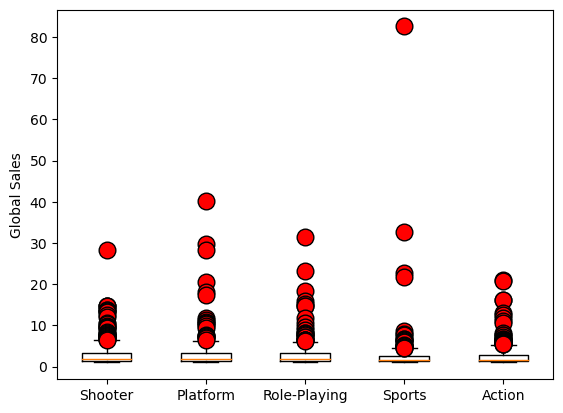

In [55]:
top_global_genres = ['Shooter','Platform','Role-Playing','Sports', 'Action']

genre_data = []


fig1, ax1 = plt.subplots()

for value in top_global_genres:
    genre_value = game_sales_df.loc[game_sales_df['Genre'] == value, 'Global_Sales'].tolist()
    genre_data.append(genre_value)



# plot. Set color of marker edge
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='black')

ax1.boxplot(genre_data, labels = top_global_genres, flierprops = flierprops )

ax1.set_ylabel('Global Sales')
plt.show()

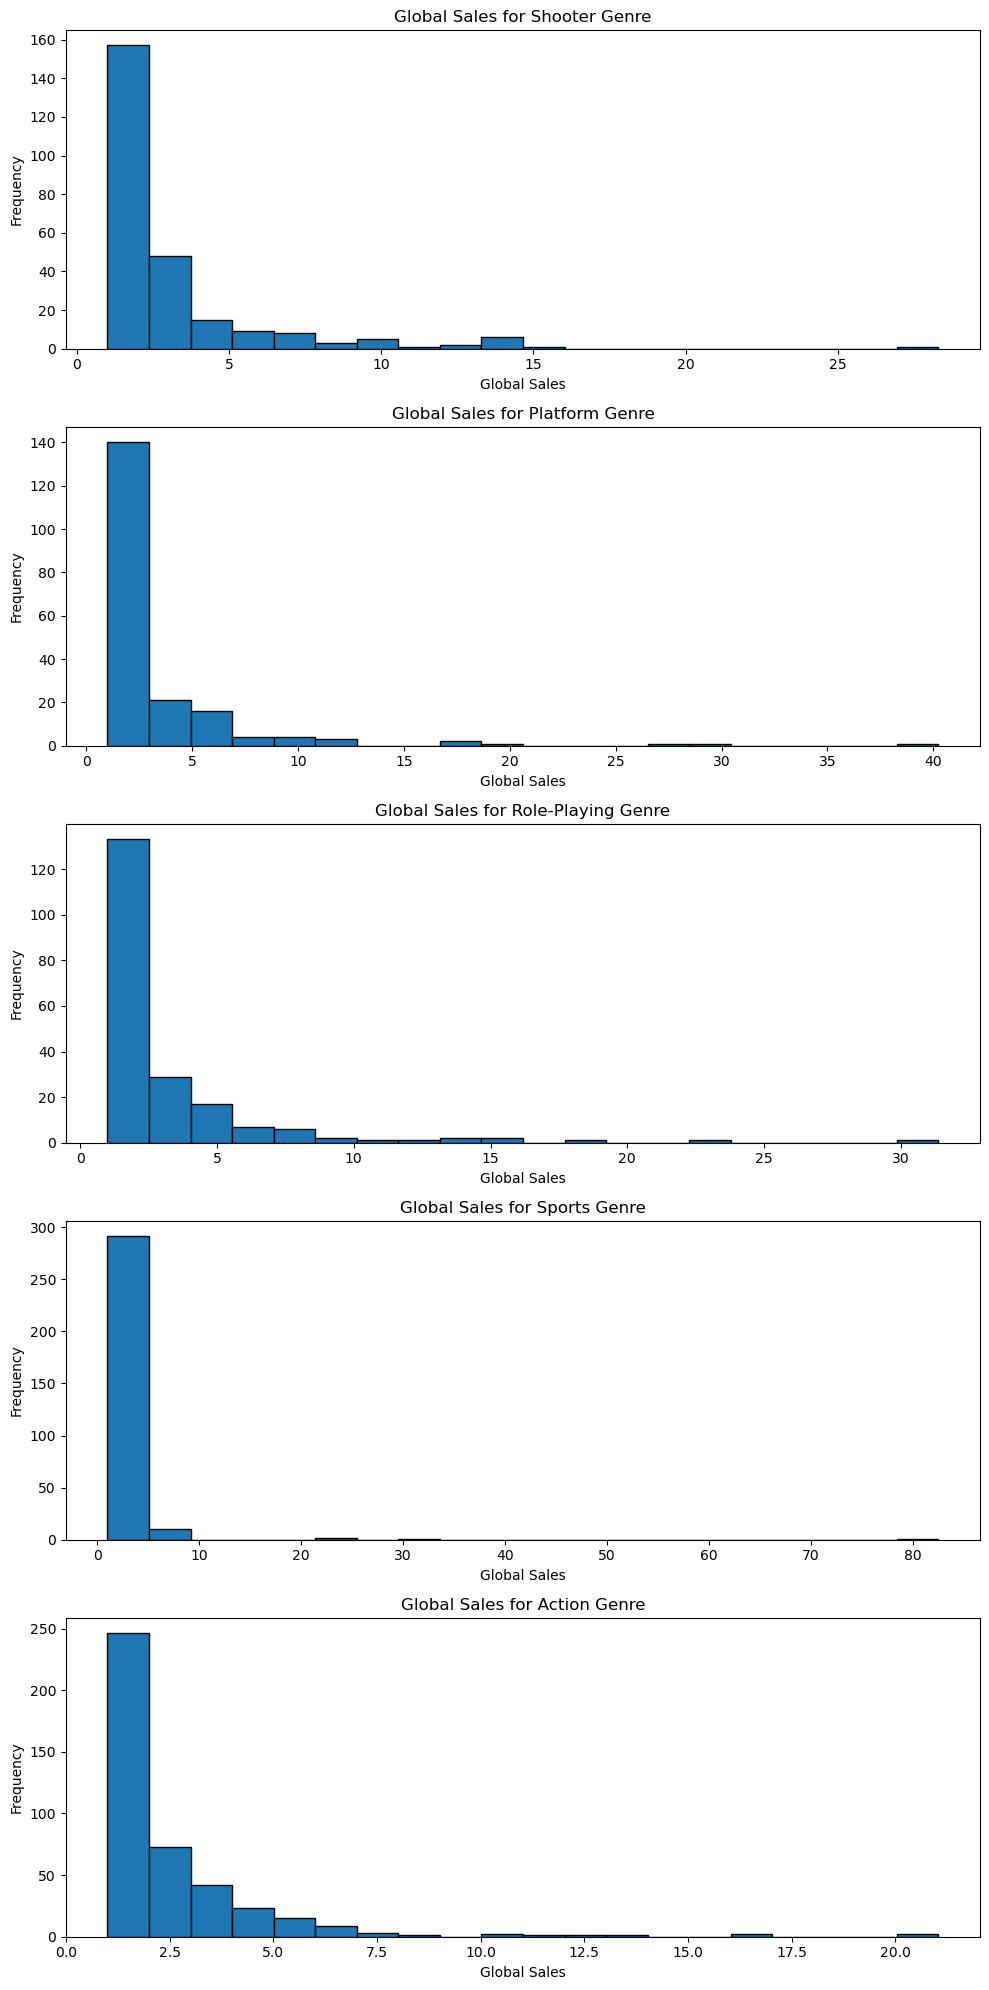

In [56]:
top_global_genres = ['Shooter','Platform','Role-Playing','Sports', 'Action']

fig, axs = plt.subplots(len(top_global_genres), 1, figsize=(10, 20))

for i, genre in enumerate(top_global_genres):
    genre_sales = game_sales_df.loc[game_sales_df['Genre'] == genre, 'Global_Sales']
    axs[i].hist(genre_sales, bins=20, edgecolor='black')
    axs[i].set_title(f'Global Sales for {genre} Genre')
    axs[i].set_xlabel('Global Sales')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [29]:

idk_df_NA = game_sales_df.groupby('Genre')['NA_Sales'].sum()


    
    # Perform the normality test
k2, p = stats.normaltest(idk_df_NA)
    
    # Print the results
   
print(f"p = {p:.2g}")
    
    # If the p-value is less than the threshold (e.g., 0.05), then we can reject the null hypothesis and assume that our data is not normally distributed.
if p < 0.05:  
    print("The null hypothesis can be rejected. Data is not normally distributed.")
else:
    print("The null hypothesis cannot be rejected. Data may be normally distributed.")
print("\n")


p = 0.55
The null hypothesis cannot be rejected. Data may be normally distributed.




/Users/admin/anaconda3/envs/dev/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [30]:

idk_df_JP = game_sales_df.groupby('Genre')['JP_Sales'].sum()


    
    # Perform the normality test
k2, p = stats.normaltest(idk_df_JP)
    
    # Print the results
   
print(f"p = {p:.2g}")
    
    # If the p-value is less than the threshold (e.g., 0.05), then we can reject the null hypothesis and assume that our data is not normally distributed.
if p < 0.05:  
    print("The null hypothesis can be rejected. Data is not normally distributed.")
else:
    print("The null hypothesis cannot be rejected. Data may be normally distributed.")
print("\n")

p = 0.00019
The null hypothesis can be rejected. Data is not normally distributed.




/Users/admin/anaconda3/envs/dev/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [59]:

idk_df_EU = game_sales_df.groupby('Genre')['EU_Sales'].sum()


    
    # Perform the normality test
k2, p = stats.normaltest(idk_df_EU)
    
    # Print the results
   
print(f"p = {p:.2g}")
    
    # If the p-value is less than the threshold (e.g., 0.05), then we can reject the null hypothesis and assume that our data is not normally distributed.
if p < 0.05:  
    print("The null hypothesis can be rejected. Data is not normally distributed.")
else:
    print("The null hypothesis cannot be rejected. Data may be normally distributed.")
print("\n")

p = 0.56
The null hypothesis cannot be rejected. Data may be normally distributed.




/Users/admin/anaconda3/envs/dev/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [32]:

idk_df_Global = game_sales_df.groupby('Genre')['Global_Sales'].sum()


    
    # Perform the normality test
k2, p = stats.normaltest(idk_df_Global)
    
    # Print the results
   
print(f"p = {p:.2g}")
    
    # If the p-value is less than the threshold (e.g., 0.05), then we can reject the null hypothesis and assume that our data is not normally distributed.
if p < 0.05:  
    print("The null hypothesis can be rejected. Data is not normally distributed.")
else:
    print("The null hypothesis cannot be rejected. Data may be normally distributed.")
print("\n")

p = 0.66
The null hypothesis cannot be rejected. Data may be normally distributed.




/Users/admin/anaconda3/envs/dev/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


ANOVA TEST FOR GENRES PER REGIONAL SALES

In [33]:
import scipy.stats as stats

game_sales_df = game_sales_df[['Genre','Global_Sales']].dropna(how = 'any')

group0 = game_sales_df[game_sales_df["Genre"] == 'Action']["Global_Sales"]
group1 = game_sales_df[game_sales_df["Genre"] == 'Adventure']["Global_Sales"]
group2 = game_sales_df[game_sales_df["Genre"] == 'Fighting']["Global_Sales"]
group3 = game_sales_df[game_sales_df["Genre"] == 'Misc']["Global_Sales"]
group4 = game_sales_df[game_sales_df["Genre"] == 'Platform']["Global_Sales"]
group5 = game_sales_df[game_sales_df["Genre"] == 'Puzzle']["Global_Sales"]
group6 = game_sales_df[game_sales_df["Genre"] == 'Racing']["Global_Sales"]
group7 = game_sales_df[game_sales_df["Genre"] == 'Role-Playing']["Global_Sales"]
group8 = game_sales_df[game_sales_df["Genre"] == 'Shooter']["Global_Sales"]
group9 = game_sales_df[game_sales_df["Genre"] == 'Simulation']["Global_Sales"]
group10 = game_sales_df[game_sales_df["Genre"] == 'Sports']["Global_Sales"]
group11 = game_sales_df[game_sales_df["Genre"] == 'Strategy']["Global_Sales"]


# Perform the ANOVA
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11)
#not significant

F_onewayResult(statistic=1.610752660613411, pvalue=0.08928230921777017)

In [37]:
game_sales_df = game_sales_df[['Genre','NA_Sales']].dropna(how = 'any')

group0 = game_sales_df[game_sales_df["Genre"] == 'Action']["NA_Sales"]
group1 = game_sales_df[game_sales_df["Genre"] == 'Adventure']["NA_Sales"]
group2 = game_sales_df[game_sales_df["Genre"] == 'Fighting']["NA_Sales"]
group3 = game_sales_df[game_sales_df["Genre"] == 'Misc']["NA_Sales"]
group4 = game_sales_df[game_sales_df["Genre"] == 'Platform']["NA_Sales"]
group5 = game_sales_df[game_sales_df["Genre"] == 'Puzzle']["NA_Sales"]
group6 = game_sales_df[game_sales_df["Genre"] == 'Racing']["NA_Sales"]
group7 = game_sales_df[game_sales_df["Genre"] == 'Role-Playing']["NA_Sales"]
group8 = game_sales_df[game_sales_df["Genre"] == 'Shooter']["NA_Sales"]
group9 = game_sales_df[game_sales_df["Genre"] == 'Simulation']["NA_Sales"]
group10 = game_sales_df[game_sales_df["Genre"] == 'Sports']["NA_Sales"]
group11 = game_sales_df[game_sales_df["Genre"] == 'Strategy']["NA_Sales"]


# Perform the ANOVA
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11) 

#significant

F_onewayResult(statistic=2.759874493161354, pvalue=0.001472309428194264)

In [39]:
game_sales_df = game_sales_df[['Genre','EU_Sales']].dropna(how = 'any')

group0 = game_sales_df[game_sales_df["Genre"] == 'Action']["EU_Sales"]
group1 = game_sales_df[game_sales_df["Genre"] == 'Adventure']["EU_Sales"]
group2 = game_sales_df[game_sales_df["Genre"] == 'Fighting']["EU_Sales"]
group3 = game_sales_df[game_sales_df["Genre"] == 'Misc']["EU_Sales"]
group4 = game_sales_df[game_sales_df["Genre"] == 'Platform']["EU_Sales"]
group5 = game_sales_df[game_sales_df["Genre"] == 'Puzzle']["EU_Sales"]
group6 = game_sales_df[game_sales_df["Genre"] == 'Racing']["EU_Sales"]
group7 = game_sales_df[game_sales_df["Genre"] == 'Role-Playing']["EU_Sales"]
group8 = game_sales_df[game_sales_df["Genre"] == 'Shooter']["EU_Sales"]
group9 = game_sales_df[game_sales_df["Genre"] == 'Simulation']["EU_Sales"]
group10 = game_sales_df[game_sales_df["Genre"] == 'Sports']["EU_Sales"]
group11 = game_sales_df[game_sales_df["Genre"] == 'Strategy']["EU_Sales"]


# Perform the ANOVA
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11)
#not significant

F_onewayResult(statistic=1.2143053717742534, pvalue=0.27147998554571795)

In [41]:
game_sales_df = game_sales_df[['Genre','JP_Sales']].dropna(how = 'any')

group0 = game_sales_df[game_sales_df["Genre"] == 'Action']["JP_Sales"]
group1 = game_sales_df[game_sales_df["Genre"] == 'Adventure']["JP_Sales"]
group2 = game_sales_df[game_sales_df["Genre"] == 'Fighting']["JP_Sales"]
group3 = game_sales_df[game_sales_df["Genre"] == 'Misc']["JP_Sales"]
group4 = game_sales_df[game_sales_df["Genre"] == 'Platform']["JP_Sales"]
group5 = game_sales_df[game_sales_df["Genre"] == 'Puzzle']["JP_Sales"]
group6 = game_sales_df[game_sales_df["Genre"] == 'Racing']["JP_Sales"]
group7 = game_sales_df[game_sales_df["Genre"] == 'Role-Playing']["JP_Sales"]
group8 = game_sales_df[game_sales_df["Genre"] == 'Shooter']["JP_Sales"]
group9 = game_sales_df[game_sales_df["Genre"] == 'Simulation']["JP_Sales"]
group10 = game_sales_df[game_sales_df["Genre"] == 'Sports']["JP_Sales"]
group11 = game_sales_df[game_sales_df["Genre"] == 'Strategy']["JP_Sales"]


# Perform the ANOVA
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11)
#significant

F_onewayResult(statistic=28.649765512781784, pvalue=1.6801260542630636e-56)